# Proyecto - Online Oil Monitoring

In this project I am going to analyze how can we predict a very important property of lubricating oils: the Total Acid Number, or TAN.

This property is a measure of the oil oxidation, which is finally a measure of its degradation level.

For this, I am going to use measurements of an oil sensor 'P' which senses electrical properties. There are also measurements of other 2 sensors, 'Y' and 'T' but in this notebook I am only going to focus on the 'P' sensor.

## 1. Get the Data

### Load libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
# Import datasets

df_A = pd.read_csv('datasets/Sistema A - Muestras Klüber Summit SH 46 - Temperatura y 4 bolas.csv')
df_B = pd.read_csv('datasets/Sistema B - Muestras Klüber Summit SH 46 - Temperatura.csv')
df_C = pd.read_csv('datasets/Sistema C - Muestras Klüber Summit SH 46 - Temperatura.csv')
df_D = pd.read_csv('datasets/Sistema D - Muestras Klüber Summit SH 46 - Temperatura sin TAN.csv')
df_D_TAN = pd.read_csv('datasets/Sistema D - Muestras Klüber Summit SH 46 - Temperatura TAN.csv')

In [3]:
df_A.head()

DATE      TIME CH0    CH1           CH2   CH3    CH4        CH5  \
0  7/20/2020   9:38:51  A0 -26.92  6.771708e+08  7.17  22.66    919,651   
1  7/20/2020   9:14:31  A1 -17.91  5.161168e+08  7.23  20.27  1,021,675   
2  7/27/2020  10:10:36  A2 -30.28  2.644380e+09 -0.32  22.13  1,086,886   
3  7/30/2020  10:26:02  A3 -51.83  3.549375e+09  8.23  22.60    936,370   
4   8/3/2020  10:39:31  A4 -32.73  1.493047e+09  2.45  24.04    872,656   

      CH6    CH7          CH8    CH9        CH10   CH11       CH12   CH13  \
0  848.95 -49.02  170484368.0 -79.85  29969904.0 -87.42  3272197.5 -79.81   
1  850.30 -44.40  149279552.0 -77.70  29757196.0 -87.24  3280669.5 -79.74   
2  844.71 -72.33  272578944.0 -86.93  32164590.0 -89.19  3308366.8 -79.87   
3  849.06 -77.13  289796864.0 -87.83  32284652.0 -89.28  3305710.0 -79.91   
4  846.57 -63.81  246616336.0 -85.39  31533764.0 -88.95  3284044.8 -79.92   

      CH14  CH15            TAN  
0  35139.2  6350  0.004 mgKOH/g  
1  35210.1  7737  0.037 mgKOH/g  
2  35008.7  3569  0.126 mgKOH/g  
3  34921.9  1794  0.239 mgKOH/g  
4  34748.5  5224  0.323 mgKOH/g

In [4]:
df_B.head()

DATE      TIME CH0    CH1           CH2    CH3    CH4        CH5  \
0  8/10/2020  12:00:42  B0 -21.44  1.823359e+09   4.01  24.57    858,485   
1  8/18/2020  10:19:36  B1 -44.80  2.447794e+09  22.81  22.23  1,126,243   
2  8/24/2020   9:48:36  B2 -20.72  1.782024e+09  33.62  20.64  1,298,301   
3  8/24/2020  10:11:36  B3 -20.25  1.934187e+09  47.22  20.91  1,320,313   
4  8/24/2020  10:34:46  B4 -16.99  1.867718e+09  34.04  20.91  1,354,935   

      CH6    CH7          CH8    CH9        CH10   CH11       CH12   CH13  \
0  847.52 -69.77  263167072.0 -86.40  31447818.0 -89.15  3244052.8 -79.96   
1  854.95 -71.85  272335872.0 -87.00  31694684.0 -89.21  3263962.0 -79.89   
2  858.74 -70.97  265465472.0 -86.36  31137298.0 -89.07  3227009.0 -79.82   
3  859.54 -72.21  274958624.0 -86.74  31705870.0 -89.18  3273480.5 -79.82   
4  853.04 -71.68  273626208.0 -86.69  31493730.0 -89.13  3258906.5 -79.82   

      CH14  CH15            TAN  
0  34285.1  4784  0.004 mgKOH/g  
1  34484.8  2192  1.764 mgKOH/g  
2  34196.7  3313  2.281 mgKOH/g  
3  34634.6  2548  2.562 mgKOH/g  
4  34477.6  2343  2.863 mgKOH/g

In [5]:
df_C.head()

DATE      TIME CH0    CH1           CH2    CH3    CH4        CH5  \
0  8/24/2020  11:07:47  C0 -21.03  1.907375e+09   5.27  21.01  1,023,847   
1  8/31/2020   9:26:16  C1 -36.85  2.436042e+09   4.84  20.27  1,025,332   
2  8/31/2020   9:49:21  C2 -36.00  2.279216e+09  11.21  21.97    984,130   
3  8/31/2020  10:10:46  C3 -36.68  2.292870e+09  18.71  22.98    995,650   
4  8/31/2020  10:32:06  C4 -35.29  2.256960e+09  17.47  23.61    986,264   

      CH6    CH7          CH8    CH9        CH10   CH11       CH12   CH13  \
0  851.64 -72.88  278042784.0 -86.71  31852840.0 -89.16  3303762.0 -79.83   
1  850.44 -74.58  284909664.0 -87.01  32087636.0 -89.28  3314361.5 -79.85   
2  849.45 -73.52  280582784.0 -86.79  32119304.0 -89.13  3310277.5 -79.88   
3  851.90 -72.94  279270080.0 -86.89  32040444.0 -89.23  3304411.8 -79.89   
4  852.29 -73.27  275590368.0 -86.78  31727244.0 -89.09  3273629.8 -79.90   

      CH14  CH15            TAN  
0  34972.8  5208  0.004 mgKOH/g  
1  35074.3  3732  0.020 mgKOH/g  
2  35062.7  3517  0.340 mgKOH/g  
3  34973.9  3711  0.813 mgKOH/g  
4  34636.2  3620  1.090 mgKOH/g

In [6]:
df_D.head()

Muestra       DATE      TIME    CH0           CH1    CH2          CH3  \
0      D1  9/16/2020  16:12:55 -13.41  9.409213e+09 -37.46  138456976.0   
1      D1  9/16/2020  16:14:33 -13.39  9.409213e+09 -37.49  134792400.0   
2      D1  9/16/2020  16:14:33 -13.39  9.409213e+09 -37.49  134792400.0   
3      D1  9/16/2020  16:16:09 -10.55  9.409213e+09 -36.79  131323888.0   
4      D1  9/16/2020  16:16:10 -10.55  9.409213e+09 -36.79  131323888.0   

     CH4         CH5    CH6        CH7    CH8      CH9        CH10    CH11  \
0 -75.35  28802400.0 -87.44  3171731.0 -80.03  34112.0   304230.44  126.68   
1 -75.01  28255572.0 -87.20  3146526.0 -80.19  34030.0  1270527.00  127.97   
2 -75.01  28255572.0 -87.20  3146526.0 -80.19  34030.0  1270527.00  127.97   
3 -75.21  28052048.0 -87.02  3121728.0 -80.31  33882.0  1272327.25  127.04   
4 -75.21  28052048.0 -87.02  3121728.0 -80.31  33882.0  1272327.25  127.04   

     CH12        CH13         CH14   CH15  
0  126.68  71891448.0  174438944.0  408.0  
1  127.97  69652368.0  169879504.0    0.0  
2  127.97  69652368.0  169879504.0    0.0  
3  127.04  58320180.0  163982960.0    0.0  
4  127.04  58320180.0  163982960.0    0.0

In [7]:
df_D_TAN.head()

Muestra            TAN                        Comentarios
0      D0  0.004 mgKOH/g  - Aceite SH 46 Nuevo (Referencia)
1      D1  0.025 mgKOH/g    - 7 horas a 160°C con agitación
2      D2  0.039 mgKOH/g   - 14 horas a 160°C con agitación
3      D3  0.083 mgKOH/g   - 21 horas a 160°C con agitación
4      D4  0.373 mgKOH/g   - 28 horas a 160°C con agitación

In [8]:
# Function to fix A, B & C datasets

def dfABC_modif(df):
    
    # rename columns
    df.rename(columns={
        'CH0': 'Sample', 
        'CH1': 'P_freq_0,3hz',
        'CH2': 'P_magn_0,3hz',
        'CH3': 'T_value',
        'CH4': 'Y_temp',
        'CH5': 'Y_visc',
        'CH6': 'Y_dens',
        'CH7': 'P_freq_10hz',
        'CH8': 'P_magn_10hz',
        'CH9': 'P_freq_100hz',
        'CH10': 'P_magn_100hz',
        'CH11': 'P_freq_1khz',
        'CH12': 'P_magn_1khz',
        'CH13': 'P_freq_100khz',
        'CH14': 'P_magn_100khz',
        'CH15': 'P_rel_hum'}, 
              inplace = True)
    
    # delete 'TIME' and 'DATE' columns (I'm doing cross section analyisis)
    df.drop(['DATE', 'TIME'], axis = 1, inplace = True)
    
    # correct 'TAN' column to leave only the number
    df['TAN'] = df['TAN'].apply(lambda x: x.split(' ')[0])
    
    return df

In [9]:
# Function to fix D dataset

def dfD_modif(df):
    
    # rename columns
    df.rename(columns={
        'Muestra': 'Sample',
        'CH0': 'P_freq_0,3hz', 
        'CH1': 'P_magn_0,3hz',
        'CH2': 'P_freq_10hz',
        'CH3': 'P_magn_10hz',
        'CH4': 'P_freq_100hz',
        'CH5': 'P_magn_100hz',
        'CH6': 'P_freq_1khz',
        'CH7': 'P_magn_1khz',
        'CH8': 'P_freq_100khz',
        'CH9': 'P_magn_100khz',
        'CH10': 'P_temp_preref_postsamp',
        'CH11': 'P_temp_postref_1',
        'CH12': 'P_temp_postref_4',
        'CH13': 'P_bulk_resist',
        'CH14': 'P_interf_imped',
        'CH15': 'P_rel_hum'}, 
              inplace = True)
    
    # Join the dataset with the 'df_D_TAN' dataset so the TAN values correspond to the measured sample
    df = df.merge(df_D_TAN, how='left', left_on='Sample', right_on='Muestra')
    
    # Keep only the rows with actual data
    df = df[:17333]
    
    # correct 'TAN' column to leave only the number
    df['TAN'] = df['TAN'].apply(lambda x: x.split(' ')[0])
    
    # delete 'TIME' and 'DATE' columns (I'm doing cross section analyisis) aswell as 'Muestra'and 'Comentarios'
    df.drop(['DATE', 'TIME', 'Muestra', 'Comentarios'], axis = 1, inplace = True)
    
    return df

In [10]:
# Function to leave only the 'P' sensor features in the datasets

def p_sensor(df, D=False):
    
    if D:
        df.drop(['P_temp_preref_postsamp', 
                 'P_temp_postref_1', 
                 'P_temp_postref_4', 
                 'P_bulk_resist',
                 'P_interf_imped'], axis = 1, inplace = True)
    else:
        df = df[[
        'Sample',
        'P_freq_0,3hz', 
        'P_magn_0,3hz',
        'P_freq_10hz',
        'P_magn_10hz',
        'P_freq_100hz',
        'P_magn_100hz',
        'P_freq_1khz',
        'P_magn_1khz',
        'P_freq_100khz',
        'P_magn_100khz',
        'P_rel_hum',
        'TAN'
        ]]
    
    return df

In [11]:
df_A = dfABC_modif(df_A)
df_A = p_sensor(df_A)
df_A.head()

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  P_freq_100hz  \
0     A0        -26.92  6.771708e+08       -49.02  170484368.0        -79.85   
1     A1        -17.91  5.161168e+08       -44.40  149279552.0        -77.70   
2     A2        -30.28  2.644380e+09       -72.33  272578944.0        -86.93   
3     A3        -51.83  3.549375e+09       -77.13  289796864.0        -87.83   
4     A4        -32.73  1.493047e+09       -63.81  246616336.0        -85.39   

   P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  P_magn_100khz  \
0    29969904.0       -87.42    3272197.5         -79.81        35139.2   
1    29757196.0       -87.24    3280669.5         -79.74        35210.1   
2    32164590.0       -89.19    3308366.8         -79.87        35008.7   
3    32284652.0       -89.28    3305710.0         -79.91        34921.9   
4    31533764.0       -88.95    3284044.8         -79.92        34748.5   

   P_rel_hum    TAN  
0       6350  0.004  
1       7737  0.037  
2       3569  0.126  
3       1794  0.239  
4       5224  0.323

In [12]:
df_B = dfABC_modif(df_B)
df_B = p_sensor(df_B)
df_B.head()

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  P_freq_100hz  \
0     B0        -21.44  1.823359e+09       -69.77  263167072.0        -86.40   
1     B1        -44.80  2.447794e+09       -71.85  272335872.0        -87.00   
2     B2        -20.72  1.782024e+09       -70.97  265465472.0        -86.36   
3     B3        -20.25  1.934187e+09       -72.21  274958624.0        -86.74   
4     B4        -16.99  1.867718e+09       -71.68  273626208.0        -86.69   

   P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  P_magn_100khz  \
0    31447818.0       -89.15    3244052.8         -79.96        34285.1   
1    31694684.0       -89.21    3263962.0         -79.89        34484.8   
2    31137298.0       -89.07    3227009.0         -79.82        34196.7   
3    31705870.0       -89.18    3273480.5         -79.82        34634.6   
4    31493730.0       -89.13    3258906.5         -79.82        34477.6   

   P_rel_hum    TAN  
0       4784  0.004  
1       2192  1.764  
2       3313  2.281  
3       2548  2.562  
4       2343  2.863

In [13]:
df_C = dfABC_modif(df_C)
df_C = p_sensor(df_C)
df_C.head()

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  P_freq_100hz  \
0     C0        -21.03  1.907375e+09       -72.88  278042784.0        -86.71   
1     C1        -36.85  2.436042e+09       -74.58  284909664.0        -87.01   
2     C2        -36.00  2.279216e+09       -73.52  280582784.0        -86.79   
3     C3        -36.68  2.292870e+09       -72.94  279270080.0        -86.89   
4     C4        -35.29  2.256960e+09       -73.27  275590368.0        -86.78   

   P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  P_magn_100khz  \
0    31852840.0       -89.16    3303762.0         -79.83        34972.8   
1    32087636.0       -89.28    3314361.5         -79.85        35074.3   
2    32119304.0       -89.13    3310277.5         -79.88        35062.7   
3    32040444.0       -89.23    3304411.8         -79.89        34973.9   
4    31727244.0       -89.09    3273629.8         -79.90        34636.2   

   P_rel_hum    TAN  
0       5208  0.004  
1       3732  0.020  
2       3517  0.340  
3       3711  0.813  
4       3620  1.090

In [14]:
df_D = dfD_modif(df_D)
df_D = p_sensor(df_D, D=True)
df_D.head()

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  P_freq_100hz  \
0     D1        -13.41  9.409213e+09       -37.46  138456976.0        -75.35   
1     D1        -13.39  9.409213e+09       -37.49  134792400.0        -75.01   
2     D1        -13.39  9.409213e+09       -37.49  134792400.0        -75.01   
3     D1        -10.55  9.409213e+09       -36.79  131323888.0        -75.21   
4     D1        -10.55  9.409213e+09       -36.79  131323888.0        -75.21   

   P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  P_magn_100khz  \
0    28802400.0       -87.44    3171731.0         -80.03        34112.0   
1    28255572.0       -87.20    3146526.0         -80.19        34030.0   
2    28255572.0       -87.20    3146526.0         -80.19        34030.0   
3    28052048.0       -87.02    3121728.0         -80.31        33882.0   
4    28052048.0       -87.02    3121728.0         -80.31        33882.0   

   P_rel_hum    TAN  
0      408.0  0.025  
1        0.0  0.025  
2        0.0  0.025  
3        0.0  0.025  
4        0.0  0.025

In [15]:
df = pd.concat([df_A, df_B, df_C, df_D]).reset_index(drop=True)
df.head()

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  P_freq_100hz  \
0     A0        -26.92  6.771708e+08       -49.02  170484368.0        -79.85   
1     A1        -17.91  5.161168e+08       -44.40  149279552.0        -77.70   
2     A2        -30.28  2.644380e+09       -72.33  272578944.0        -86.93   
3     A3        -51.83  3.549375e+09       -77.13  289796864.0        -87.83   
4     A4        -32.73  1.493047e+09       -63.81  246616336.0        -85.39   

   P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  P_magn_100khz  \
0    29969904.0       -87.42    3272197.5         -79.81        35139.2   
1    29757196.0       -87.24    3280669.5         -79.74        35210.1   
2    32164590.0       -89.19    3308366.8         -79.87        35008.7   
3    32284652.0       -89.28    3305710.0         -79.91        34921.9   
4    31533764.0       -88.95    3284044.8         -79.92        34748.5   

   P_rel_hum    TAN  
0     6350.0  0.004  
1     7737.0  0.037  
2     3569.0  0.126  
3     1794.0  0.239  
4     5224.0  0.323

### 2. Explore the Data

In [16]:
df.head(50)

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz   P_magn_10hz  \
0       A0 -2.692000e+01  6.771708e+08       -49.02  1.704844e+08   
1       A1 -1.791000e+01  5.161168e+08       -44.40  1.492796e+08   
2       A2 -3.028000e+01  2.644380e+09       -72.33  2.725789e+08   
3       A3 -5.183000e+01  3.549375e+09       -77.13  2.897969e+08   
4       A4 -3.273000e+01  1.493047e+09       -63.81  2.466163e+08   
5       A5 -3.399000e+01  1.554865e+09       -67.05  2.590188e+08   
6       A6 -1.940000e+01  8.403726e+08       -56.35  2.119271e+08   
7       A7 -4.343000e+01  2.553950e+09       -72.70  2.751122e+08   
8       A8 -2.142000e+01  1.602989e+09       -68.19  2.561524e+08   
9       B0 -2.144000e+01  1.823359e+09       -69.77  2.631671e+08   
10      B1 -4.480000e+01  2.447794e+09       -71.85  2.723359e+08   
11      B2 -2.072000e+01  1.782024e+09       -70.97  2.654655e+08   
12      B3 -2.025000e+01  1.934187e+09       -72.21  2.749586e+08   
13      B4 -1.699000e+01  1.867718e+09       -71.68  2.736262e+08   
14      C0 -2.103000e+01  1.907375e+09       -72.88  2.780428e+08   
15      C1 -3.685000e+01  2.436042e+09       -74.58  2.849097e+08   
16      C2 -3.600000e+01  2.279216e+09       -73.52  2.805828e+08   
17      C3 -3.668000e+01  2.292870e+09       -72.94  2.792701e+08   
18      C4 -3.529000e+01  2.256960e+09       -73.27  2.755904e+08   
19      C5 -3.448000e+01  2.191713e+09       -73.90  2.775969e+08   
20      C6 -2.582000e+01  1.351081e+09       -63.25  2.500185e+08   
21      C7 -2.873000e+01  1.407461e+09       -64.97  2.519763e+08   
22      C8 -2.939000e+01  1.480849e+09       -66.36  2.562944e+08   
23      C9 -2.846000e+01  1.585304e+09       -67.15  2.601387e+08   
24     C10 -3.129000e+01  1.762214e+09       -69.45  2.678711e+08   
25     C11 -4.280000e+01  2.452646e+09       -73.14  2.745736e+08   
26     C12 -3.989000e+01  2.275960e+09       -71.50  2.720548e+08   
27     C13 -4.115000e+01  2.343287e+09       -73.35  2.798526e+08   
28     C14 -3.951000e+01  2.571781e+09       -74.33  2.821507e+08   
29     C15 -4.700000e+01  2.780116e+09       -74.49  2.808248e+08   
30     C16 -4.060000e+01  4.509288e+09       -80.92  2.975134e+08   
31  -18.78  3.340518e+09 -8.308000e+01   3167309.00 -8.003000e+01   
32  -20.37  4.794571e+09 -8.202000e+01   3149237.00 -7.997000e+01   
33      D1 -1.341000e+01  9.409213e+09       -37.46  1.384570e+08   
34      D1 -1.339000e+01  9.409213e+09       -37.49  1.347924e+08   
35      D1 -1.339000e+01  9.409213e+09       -37.49  1.347924e+08   
36      D1 -1.055000e+01  9.409213e+09       -36.79  1.313239e+08   
37      D1 -1.055000e+01  9.409213e+09       -36.79  1.313239e+08   
38      D1 -1.164000e+01  3.233811e+08       -37.60  1.329646e+08   
39      D1 -1.465000e+01  3.348156e+08       -40.27  1.391958e+08   
40      D1 -1.465000e+01  3.348156e+08       -40.27  1.391958e+08   
41      D1 -1.466000e+01  3.348156e+08       -41.49  1.440938e+08   
42      D1 -1.466000e+01  3.348156e+08       -41.49  1.440938e+08   
43      D1 -1.465000e+01  3.348156e+08       -43.27  1.497600e+08   
44      D1 -1.465000e+01  3.348156e+08       -43.27  1.497600e+08   
45      D1 -1.508000e+01  4.304161e+08       -44.90  1.567369e+08   
46      D1 -1.472000e+01  4.304161e+08       -45.65  1.628111e+08   
47      D1 -1.472000e+01  4.304161e+08       -45.65  1.628111e+08   
48      D1 -1.583000e+01  4.304161e+08       -47.27  1.696963e+08   
49      D1 -1.583000e+01  4.304161e+08       -47.27  1.696963e+08   

    P_freq_100hz  P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  \
0         -79.85   29969904.00       -87.42   3272197.50  -7.981000e+01   
1         -77.70   29757196.00       -87.24   3280669.50  -7.974000e+01   
2         -86.93   32164590.00       -89.19   3308366.80  -7.987000e+01   
3         -87.83   32284652.00       -89.28   3305710.00  -7.991000e+01   
4         -85.39   31533764.00       -88.95   3284044.80  -7.992000e+01   
5         -85.59   31386072.00    

In [17]:
df.describe()

P_freq_0,3hz  P_magn_0,3hz   P_freq_10hz   P_magn_10hz  P_freq_100hz  \
count  1.736600e+04  1.736600e+04  1.736600e+04  1.736600e+04  17366.000000   
mean   4.684086e+05  9.777330e+09  2.795545e+02  3.011074e+08    -84.909835   
std    4.434192e+07  7.008741e+09  3.389344e+04  2.549593e+07    357.426603   
min   -1.709600e+02 -8.308000e+01 -8.869000e+01 -8.003000e+01    -89.560000   
25%   -5.371000e+01  5.824685e+09 -8.721000e+01  3.026390e+08    -89.340000   
50%   -4.355000e+01  8.830850e+09 -8.669000e+01  3.069827e+08    -89.190000   
75%   -2.789250e+01  1.208234e+10 -8.425000e+01  3.098954e+08    -88.910000   
max    4.794571e+09  1.739280e+11  3.167309e+06  3.171577e+08  33291.000000   

       P_magn_100hz   P_freq_1khz   P_magn_1khz  P_freq_100khz  P_magn_100khz  \
count  1.736600e+04  17366.000000  1.736600e+04   1.736600e+04   1.736600e+04   
mean   3.138774e+07    -89.470083  3.206202e+06   1.579280e+05   3.026447e+05   
std    7.804750e+05      1.608049  6.538160e+04   1.506373e+07   2.514208e+07   
min    0.000000e+00    -89.760000  0.000000e+00  -8.098000e+01   0.000000e+00   
25%    3.129355e+07    -89.610000  3.187202e+06  -8.010000e+01   3.348700e+04   
50%    3.136700e+07    -89.570000  3.197133e+06  -8.004000e+01   3.361500e+04   
75%    3.151441e+07    -89.530000  3.211933e+06  -8.001000e+01   3.379500e+04   
max    3.263641e+07     27.350000  3.332328e+06   1.668754e+09   2.526833e+09   

          P_rel_hum  
count  17366.000000  
mean    1401.600599  
std     1023.567846  
min        0.000000  
25%      684.000000  
50%     1175.000000  
75%     2186.500000  
max     7737.000000

In [18]:
df.dtypes

Sample            object
P_freq_0,3hz     float64
P_magn_0,3hz     float64
P_freq_10hz      float64
P_magn_10hz      float64
P_freq_100hz     float64
P_magn_100hz     float64
P_freq_1khz      float64
P_magn_1khz      float64
P_freq_100khz    float64
P_magn_100khz    float64
P_rel_hum        float64
TAN               object
dtype: object

In [19]:
# Convert 'TAN' column to float

df['TAN'] = pd.to_numeric(df['TAN'], downcast='float')
df.dtypes

Sample            object
P_freq_0,3hz     float64
P_magn_0,3hz     float64
P_freq_10hz      float64
P_magn_10hz      float64
P_freq_100hz     float64
P_magn_100hz     float64
P_freq_1khz      float64
P_magn_1khz      float64
P_freq_100khz    float64
P_magn_100khz    float64
P_rel_hum        float64
TAN              float32
dtype: object

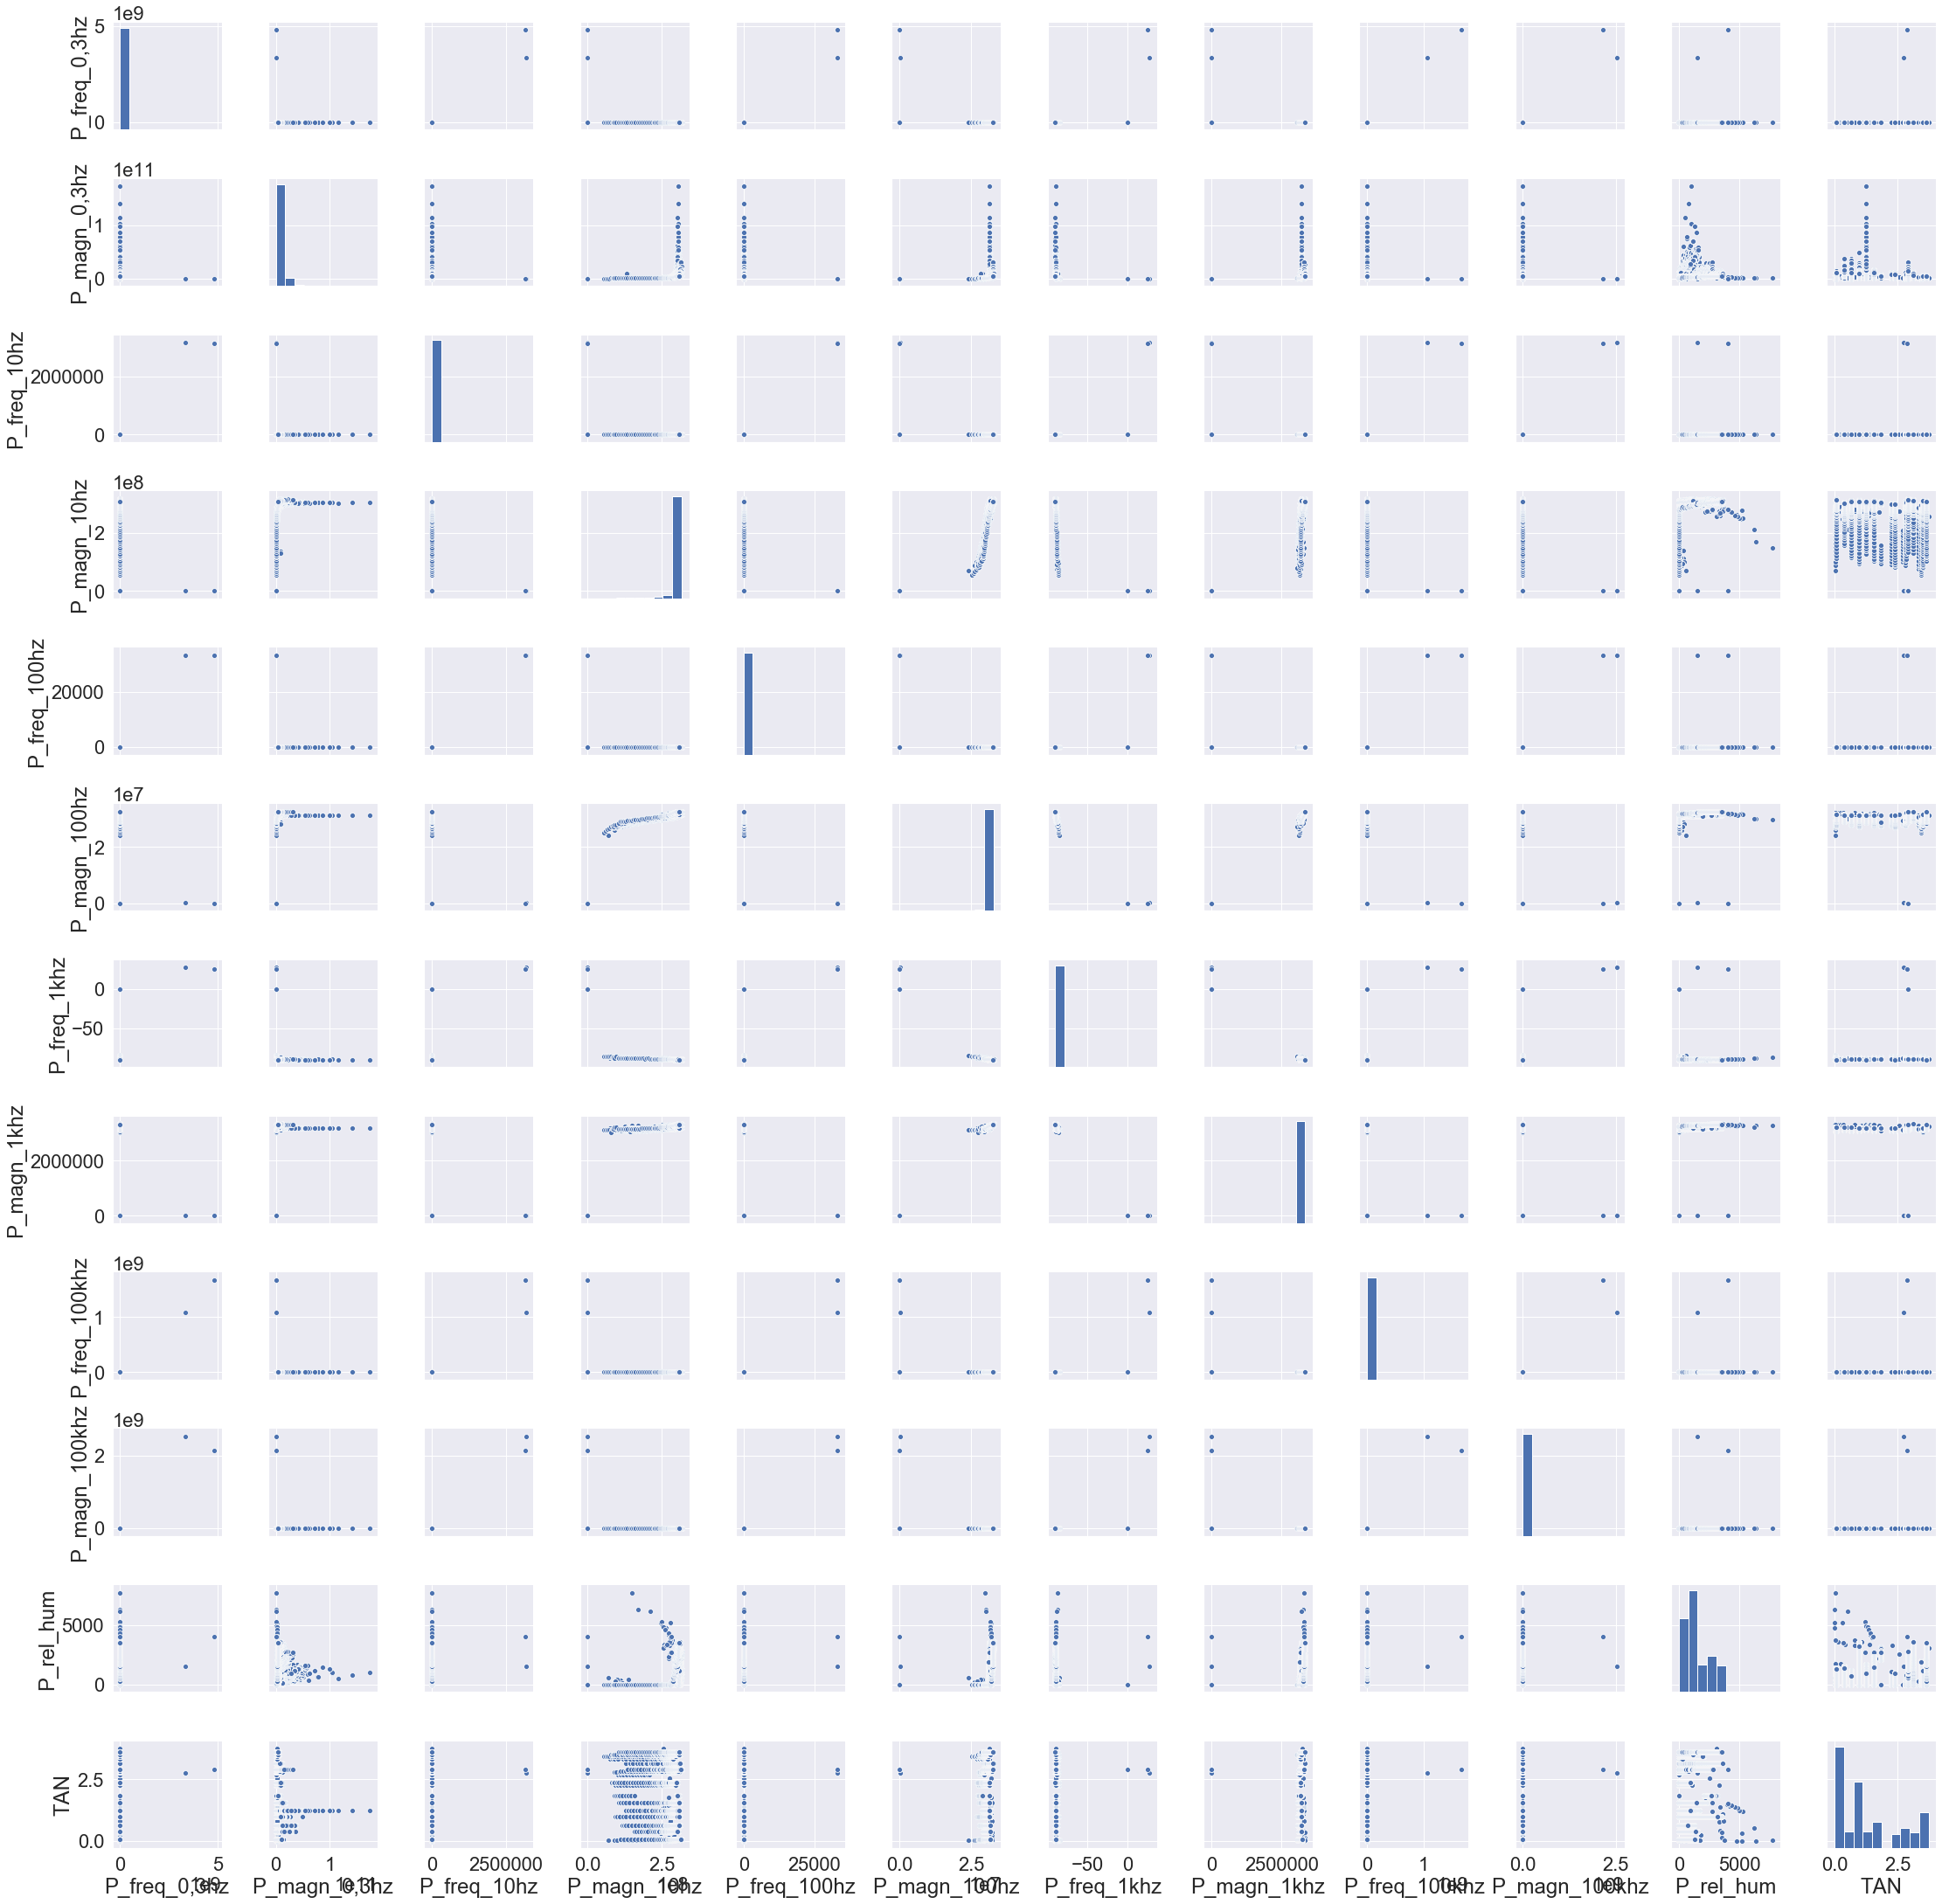

In [20]:
# View pairplots of all the features (they are all numerical)

sns.set(font_scale=2)
sns.pairplot(df, height = 2.5)
plt.show()

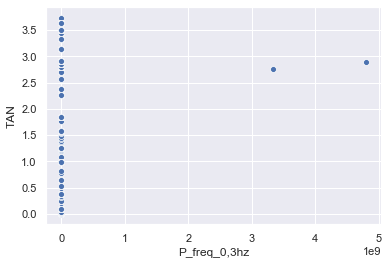

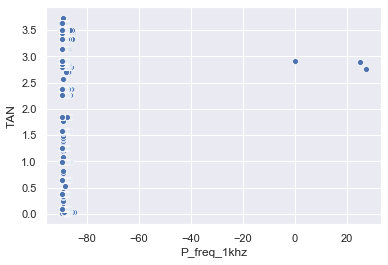

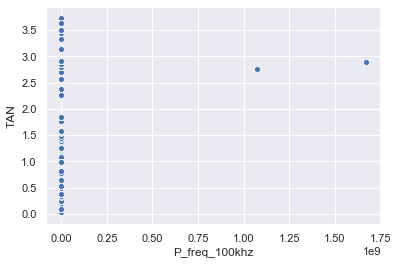

In [21]:
# There are clearly some outliers

sns.set()
sns.scatterplot(data=df, x='P_freq_0,3hz', y='TAN')
plt.show()
sns.scatterplot(data=df, x='P_freq_1khz', y='TAN')
plt.show()
sns.scatterplot(data=df, x='P_freq_100khz', y='TAN')

In [22]:
df[df['P_freq_0,3hz']>3e9]

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  \
31  -18.78  3.340518e+09        -83.08    3167309.0       -80.03   
32  -20.37  4.794571e+09        -82.02    3149237.0       -79.97   

    P_freq_100hz  P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  \
31       33291.0     276527.66        27.35        27.35   1.075215e+09   
32       33144.0         25.07        25.17        25.17   1.668754e+09   

    P_magn_100khz  P_rel_hum    TAN  
31   2.526833e+09     1510.0  2.750  
32   2.143250e+09     4053.0  2.894

In [23]:
df[df['P_freq_1khz']>=0]

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  \
31     -18.78  3.340518e+09        -83.08    3167309.0       -80.03   
32     -20.37  4.794571e+09        -82.02    3149237.0       -79.97   
13726     D15  0.000000e+00          0.00          0.0         0.00   
13727     D15  0.000000e+00          0.00          0.0         0.00   

       P_freq_100hz  P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  \
31          33291.0     276527.66        27.35        27.35   1.075215e+09   
32          33144.0         25.07        25.17        25.17   1.668754e+09   
13726           0.0          0.00         0.00         0.00   0.000000e+00   
13727           0.0          0.00         0.00         0.00   0.000000e+00   

       P_magn_100khz  P_rel_hum    TAN  
31      2.526833e+09     1510.0  2.750  
32      2.143250e+09     4053.0  2.894  
13726   0.000000e+00        0.0  2.902  
13727   0.000000e+00        0.0  2.902

In [24]:
df[df['P_freq_100khz']==0]

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  \
1308      D3        -54.43  8.533994e+09       -87.16  310423808.0   
13726    D15          0.00  0.000000e+00         0.00          0.0   
13727    D15          0.00  0.000000e+00         0.00          0.0   
14564    D16        -14.05  2.877360e+09       -79.89  295030784.0   
14565    D16        -14.05  2.877360e+09       -79.89  295030784.0   
16789    D20        -19.17  3.573397e+09       -82.67  304676128.0   

       P_freq_100hz  P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  \
1308         -89.33    31468974.0       -89.57    3207540.0            0.0   
13726          0.00           0.0         0.00          0.0            0.0   
13727          0.00           0.0         0.00          0.0            0.0   
14564        -88.10    31867464.0       -89.32    3290092.0            0.0   
14565        -88.10    31867464.0       -89.32    3290092.0            0.0   
16789        -88.72    32495516.0       -89.57    3301239.0            0.0   

       P_magn_100khz  P_rel_hum    TAN  
1308         33734.0      229.0  0.083  
13726            0.0        0.0  2.902  
13727            0.0        0.0  2.902  
14564        34481.0      688.0  3.136  
14565        34481.0      688.0  3.136  
16789        34713.0     2559.0  3.626

In [25]:
# The 0,3hz and 1khz outliers are clearly wrong so I'll drop them

df = df.drop([31, 32, 13726, 13727]).reset_index(drop=True)
df.head()

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  P_freq_100hz  \
0     A0        -26.92  6.771708e+08       -49.02  170484368.0        -79.85   
1     A1        -17.91  5.161168e+08       -44.40  149279552.0        -77.70   
2     A2        -30.28  2.644380e+09       -72.33  272578944.0        -86.93   
3     A3        -51.83  3.549375e+09       -77.13  289796864.0        -87.83   
4     A4        -32.73  1.493047e+09       -63.81  246616336.0        -85.39   

   P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  P_magn_100khz  \
0    29969904.0       -87.42    3272197.5         -79.81        35139.2   
1    29757196.0       -87.24    3280669.5         -79.74        35210.1   
2    32164590.0       -89.19    3308366.8         -79.87        35008.7   
3    32284652.0       -89.28    3305710.0         -79.91        34921.9   
4    31533764.0       -88.95    3284044.8         -79.92        34748.5   

   P_rel_hum    TAN  
0     6350.0  0.004  
1     7737.0  0.037  
2     3569.0  0.126  
3     1794.0  0.239  
4     5224.0  0.323

I will leave the outliers from 100khz for now, and imput them later.

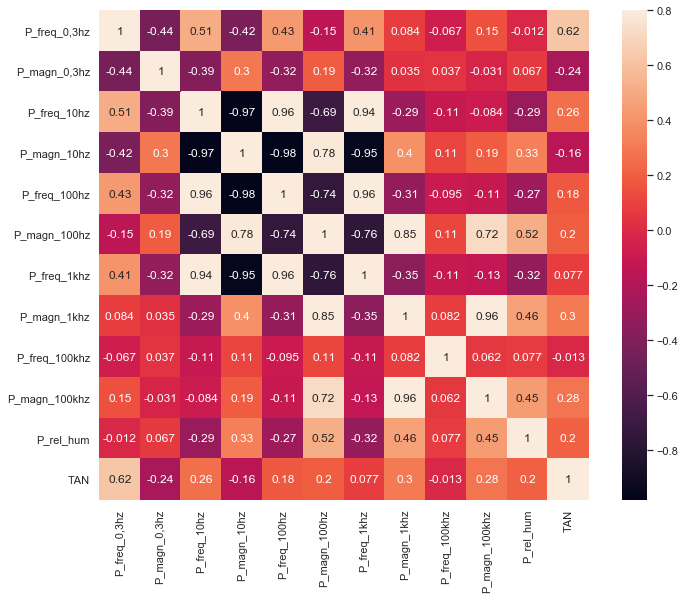

In [26]:
sns.set()
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, vmax=.8, square=True);

We can already see some correlations in the plot:
* Our Target 'TAN' is mostly correlated with the 0,3Hz frequencies, and a little with 10Hz. This means that it is mostly correlated with low frequencies.
* There is clear correlation between frequency and magnitude of the same frequency, so there is multicollinearity. This is expected to happen but we should further explore this variables and transform them so that they don't give redundant information.

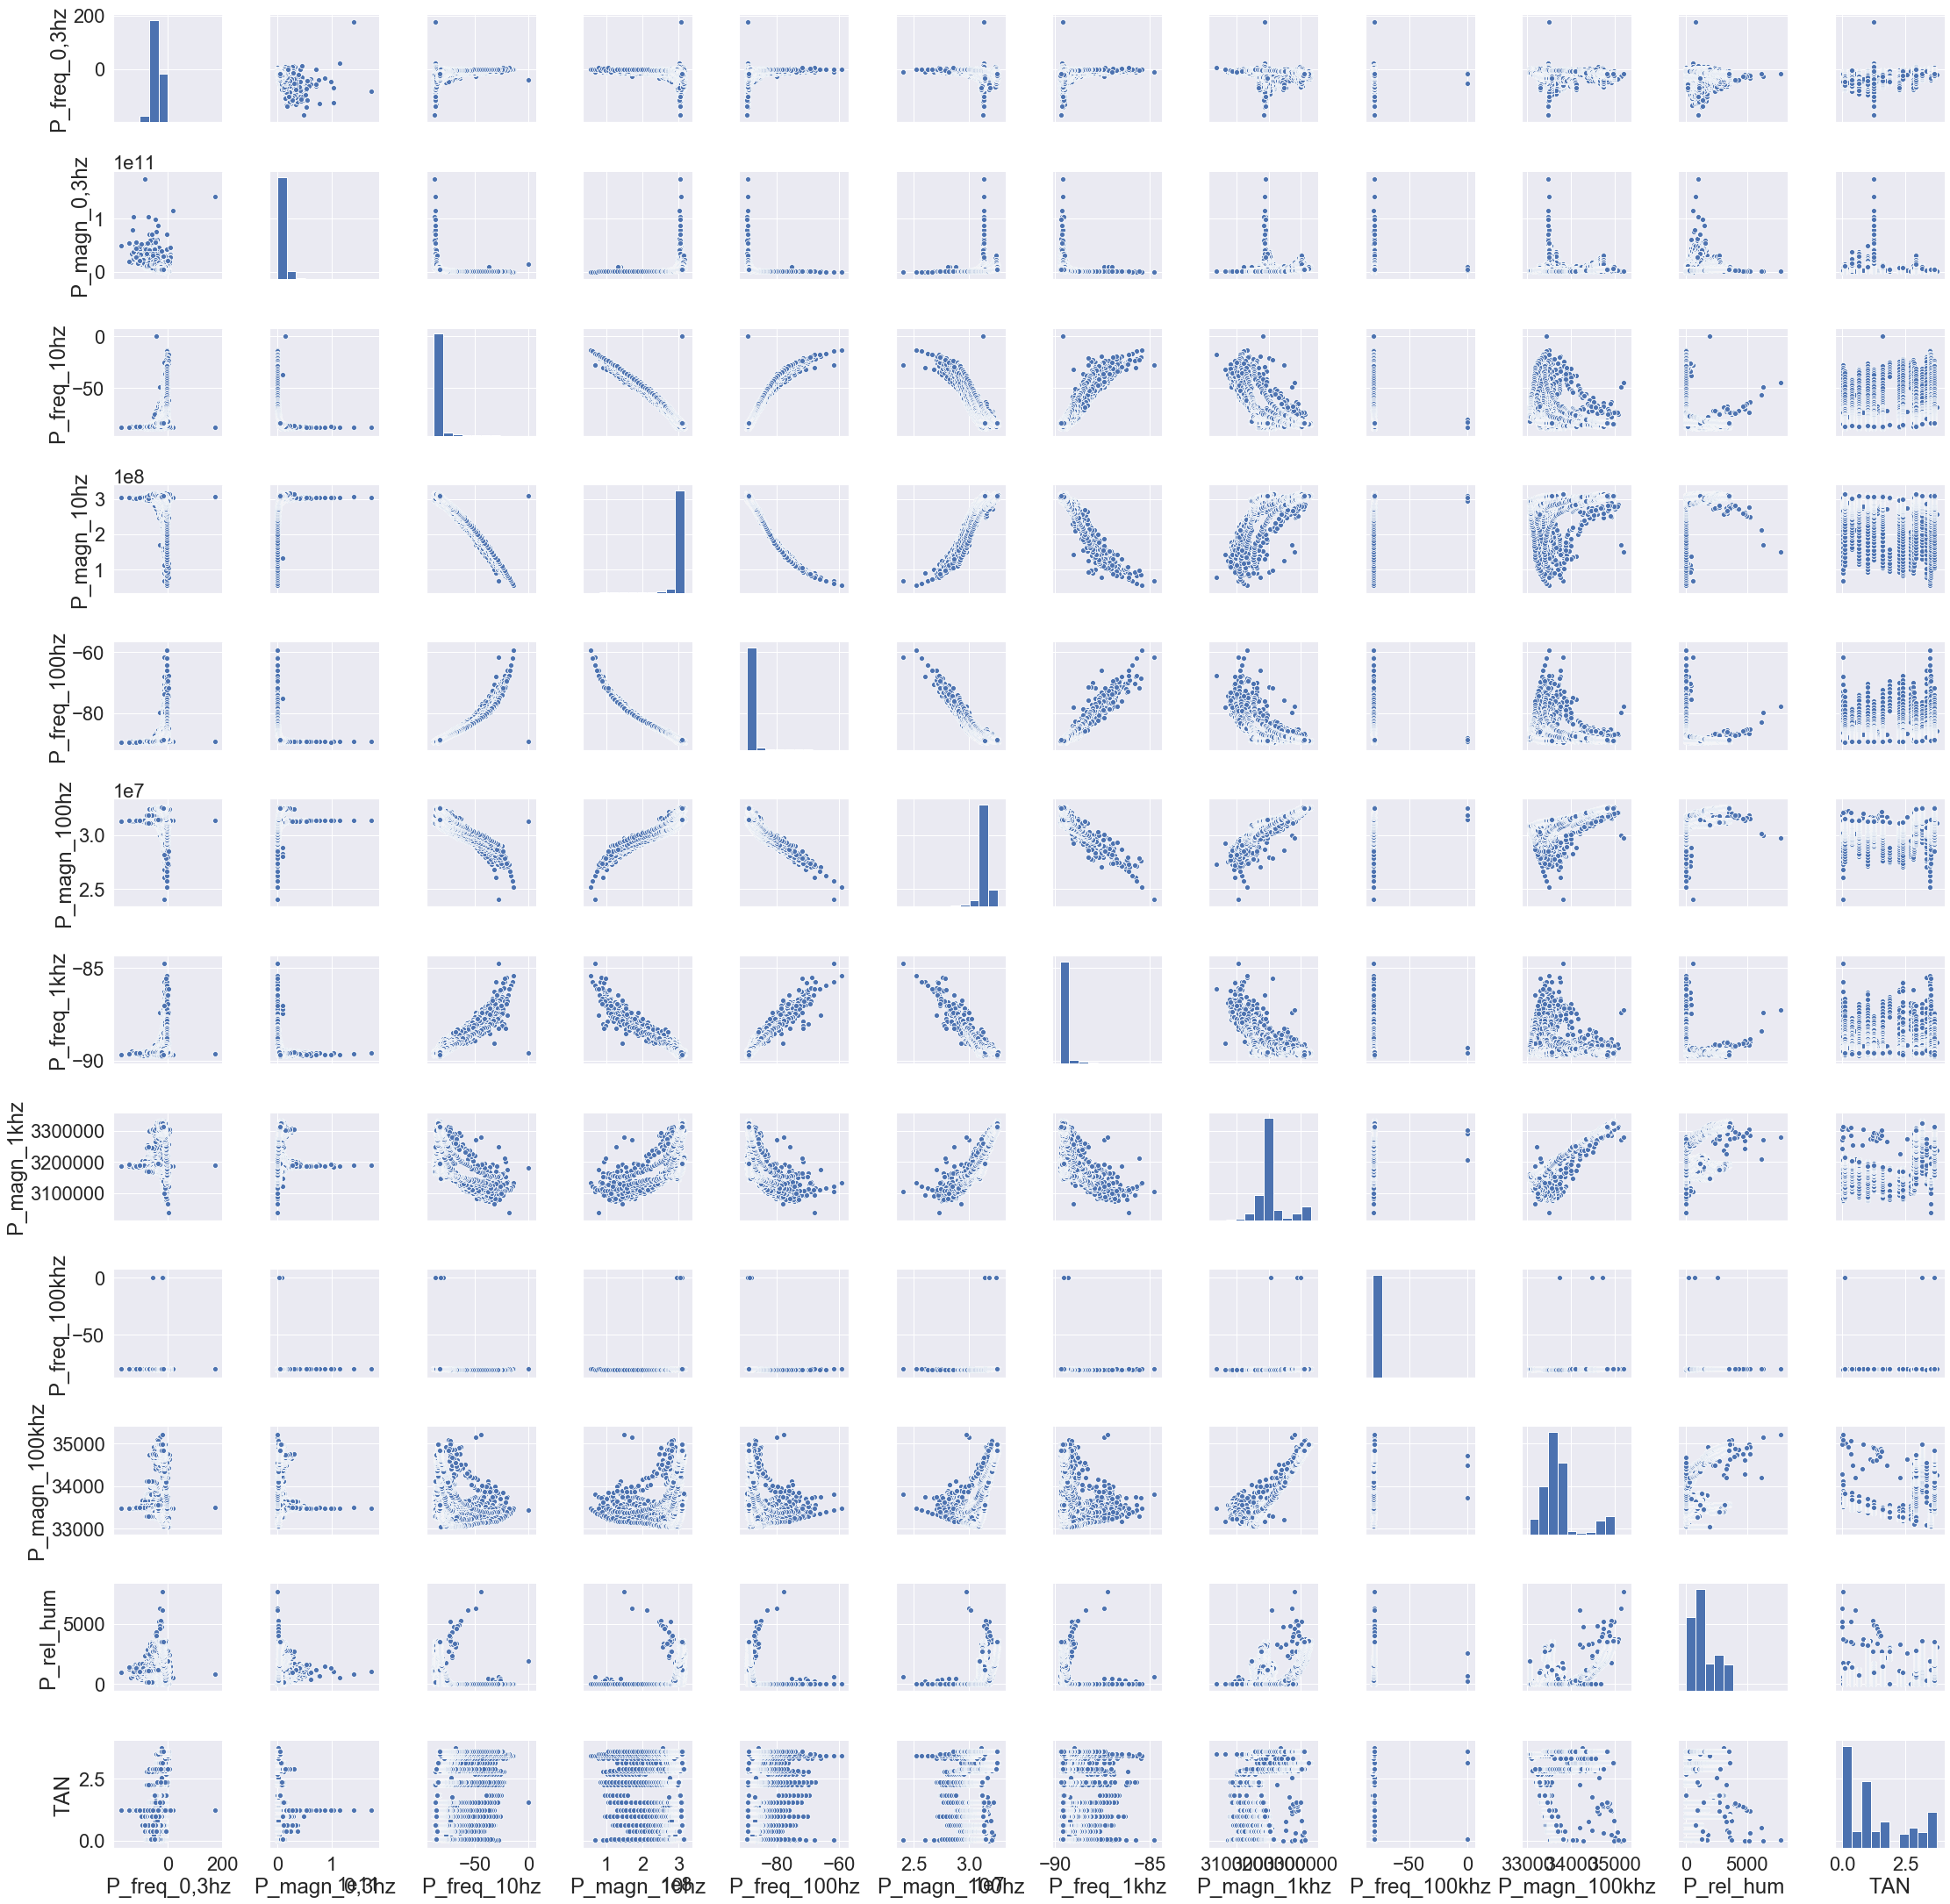

In [27]:
sns.set(font_scale=2)
sns.pairplot(df, height = 2.5)
plt.show()


 mu = 1.35 and sigma = 1.21



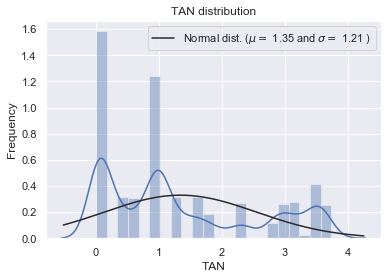

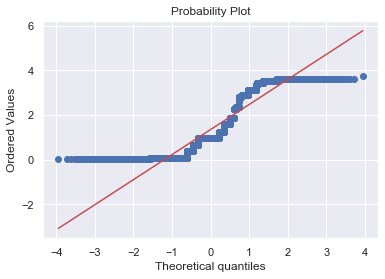

In [28]:
sns.set()
sns.distplot(df['TAN'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['TAN'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('TAN distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['TAN'], plot=plt)
plt.show()

## 3. Prepare the Data

There is no categorical data, only numerical.

In [29]:
# The relative humidity should be a value between 0 and 1 so I will divide by 10000

df['P_rel_hum'] = df['P_rel_hum']/10000

In [30]:
df[df['P_freq_100khz']==0]

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  \
1306      D3        -54.43  8.533994e+09       -87.16  310423808.0   
14560    D16        -14.05  2.877360e+09       -79.89  295030784.0   
14561    D16        -14.05  2.877360e+09       -79.89  295030784.0   
16785    D20        -19.17  3.573397e+09       -82.67  304676128.0   

       P_freq_100hz  P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  \
1306         -89.33    31468974.0       -89.57    3207540.0            0.0   
14560        -88.10    31867464.0       -89.32    3290092.0            0.0   
14561        -88.10    31867464.0       -89.32    3290092.0            0.0   
16785        -88.72    32495516.0       -89.57    3301239.0            0.0   

       P_magn_100khz  P_rel_hum    TAN  
1306         33734.0     0.0229  0.083  
14560        34481.0     0.0688  3.136  
14561        34481.0     0.0688  3.136  
16785        34713.0     0.2559  3.626

In [31]:
df['P_freq_100khz'].mean()

-80.087140306422

In [32]:
df['P_freq_100khz']=df['P_freq_100khz'].mask(df['P_freq_100khz']==0).fillna(df['P_freq_100khz'].mean())
df[df['P_freq_100khz']==0]

Empty DataFrame
Columns: [Sample, P_freq_0,3hz, P_magn_0,3hz, P_freq_10hz, P_magn_10hz, P_freq_100hz, P_magn_100hz, P_freq_1khz, P_magn_1khz, P_freq_100khz, P_magn_100khz, P_rel_hum, TAN]
Index: []

At each frequency, value 'freq' and 'magn' correspond to phase and magnitude of those frequencies. To get uncorrelated features which give different information, I am going to convert those values to a complex number, keeping Real and Imaginary parts as 2 different features for each frequency.

Given a complex number $z$, the phase $\phi$ and the magnitude $r$, we can write $z$ as:

$
z = r.(cos\phi+i.sin\phi) \\ 
Re(z) = r.cos\phi \\
Im(z) = r.sin\phi
$

In [33]:
df['Real_0,3hz'] = df['P_magn_0,3hz']*np.cos(np.deg2rad(df['P_freq_0,3hz']))
df['Imag_0,3hz'] = df['P_magn_0,3hz']*np.sin(np.deg2rad(df['P_freq_0,3hz']))

df['Real_10hz'] = df['P_magn_10hz']*np.cos(np.deg2rad(df['P_freq_10hz']))
df['Imag_10hz'] = df['P_magn_10hz']*np.sin(np.deg2rad(df['P_freq_10hz']))

df['Real_100hz'] = df['P_magn_100hz']*np.cos(np.deg2rad(df['P_freq_100hz']))
df['Imag_100hz'] = df['P_magn_100hz']*np.sin(np.deg2rad(df['P_freq_100hz']))

df['Real_1khz'] = df['P_magn_1khz']*np.cos(np.deg2rad(df['P_freq_1khz']))
df['Imag_1khz'] = df['P_magn_1khz']*np.sin(np.deg2rad(df['P_freq_1khz']))

df['Real_100khz'] = df['P_magn_100khz']*np.cos(np.deg2rad(df['P_freq_100khz']))
df['Imag_100khz'] = df['P_magn_100khz']*np.sin(np.deg2rad(df['P_freq_100khz']))

In [34]:
df.iloc[:,-12:].drop(['TAN'], axis=1)

P_rel_hum    Real_0,3hz    Imag_0,3hz     Real_10hz     Imag_10hz  \
0         0.6350  6.037922e+08 -3.065863e+08  1.118029e+08 -1.287052e+08   
1         0.7737  4.911062e+08 -1.587176e+08  1.066562e+08 -1.044454e+08   
2         0.3569  2.283612e+09 -1.333366e+09  8.273703e+07 -2.597188e+08   
3         0.1794  2.193503e+09 -2.790450e+09  6.454927e+07 -2.825166e+08   
4         0.5224  1.255992e+09 -8.072617e+08  1.088439e+08 -2.212976e+08   
...          ...           ...           ...           ...           ...   
17357     0.3496  4.075799e+09 -1.527934e+09  3.791065e+07 -3.009385e+08   
17358     0.3491  3.874007e+09 -1.464638e+09  3.601673e+07 -3.043038e+08   
17359     0.3491  3.874007e+09 -1.464638e+09  3.601673e+07 -3.043038e+08   
17360     0.3497  4.276114e+09 -1.791368e+09  3.511652e+07 -3.053702e+08   
17361     0.3517  4.450056e+09 -1.300444e+09  3.648317e+07 -3.068681e+08   

         Real_100hz    Imag_100hz      Real_1khz     Imag_1khz  Real_100khz  \
0      5.281470e+06 -2.950087e+07  147295.610754 -3.268881e+06  6216.579992   
1      6.339187e+06 -2.907414e+07  157972.305955 -3.276864e+06  6271.457182   
2      1.722606e+06 -3.211843e+07   46769.375834 -3.308036e+06  6157.406709   
3      1.222445e+06 -3.226150e+07   41539.683703 -3.305449e+06  6118.138611   
4      2.534460e+06 -3.143175e+07   60179.895662 -3.283493e+06  6081.788765   
...             ...           ...            ...           ...          ...   
17357  6.480341e+05 -3.256554e+07   22536.223610 -3.310796e+06  6084.431834   
17358  6.202910e+05 -3.260162e+07   25421.382447 -3.310248e+06  6072.634073   
17359  6.202910e+05 -3.260162e+07   25421.382447 -3.310248e+06  6072.634073   
17360  6.364937e+05 -3.255693e+07   15017.492986 -3.309358e+06  6085.130552   
17361  6.590676e+05 -3.254882e+07   18500.410646 -3.312451e+06  6071.413723   

        Imag_100khz  
0     -34584.931832  
1     -34647.077320  
2     -34462.957190  
3     -34381.789941  
4     -34212.133778  
...             ...  
17357 -34296.470857  
17358 -34299.577321  
17359 -34299.577321  
17360 -34300.409359  
17361 -34292.684517  

[17362 rows x 11 columns]

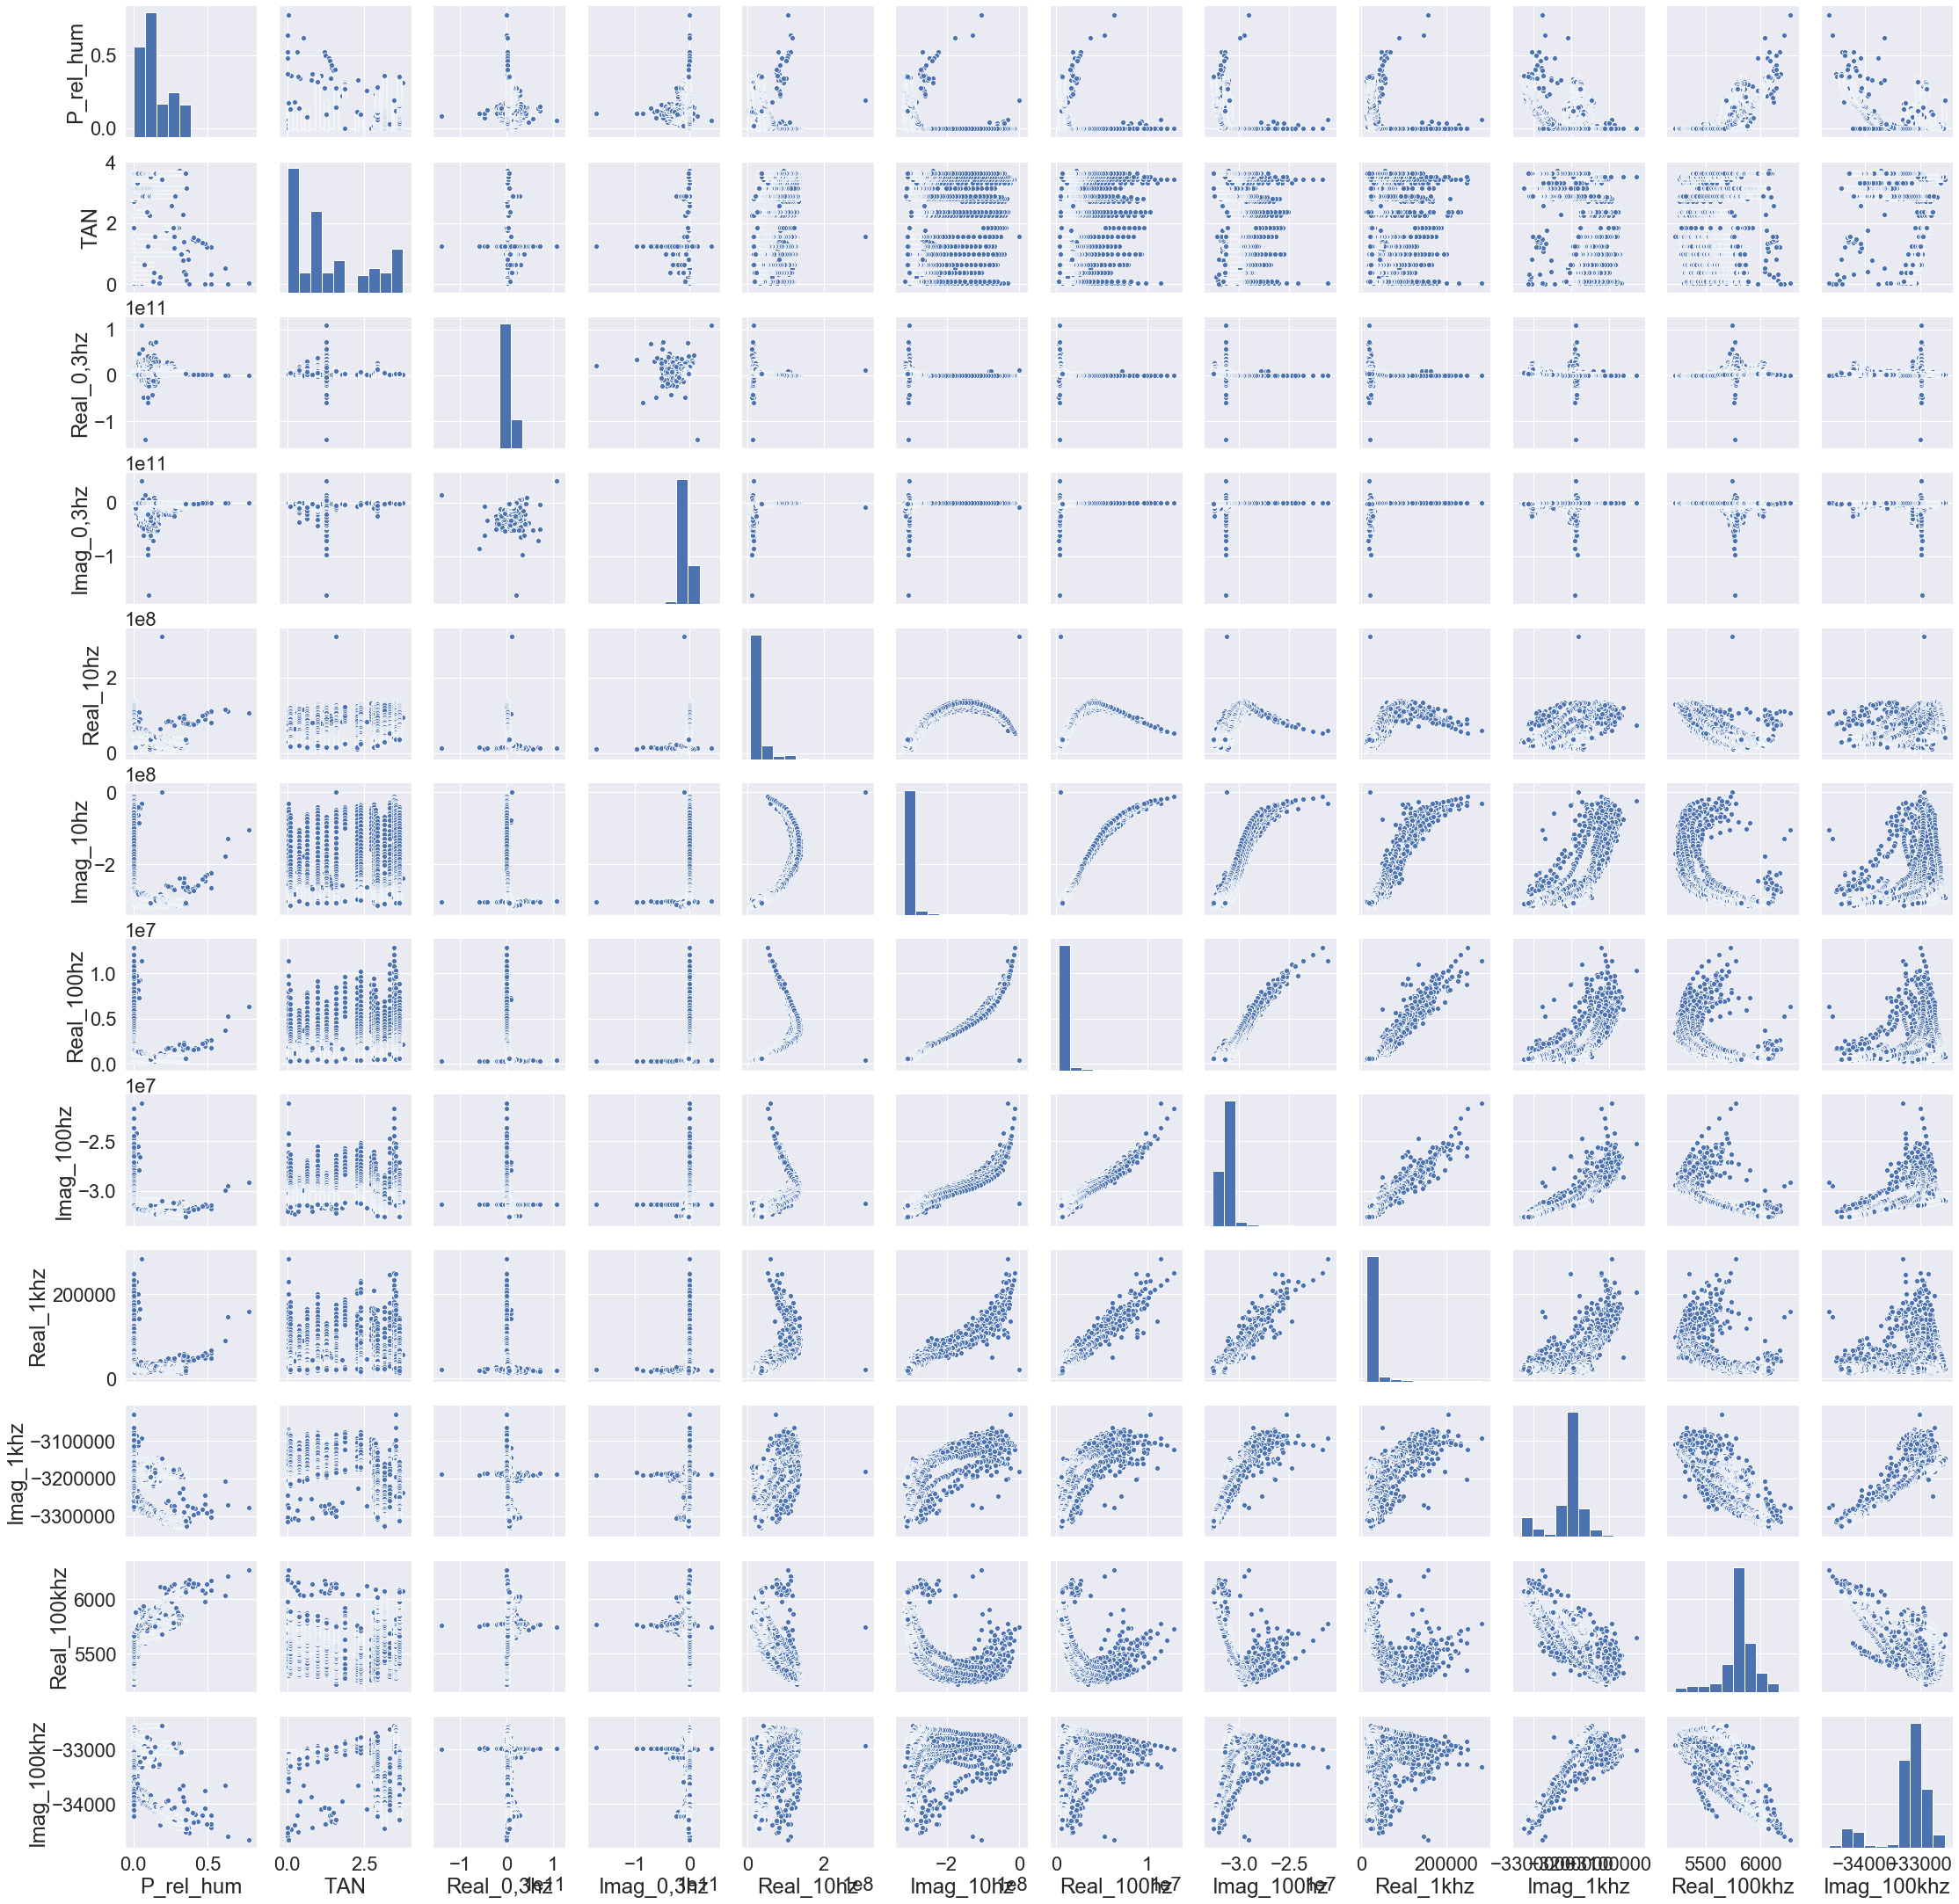

In [35]:
sns.set(font_scale=2)
sns.pairplot(df.iloc[:,-12:], height = 2.5)
plt.show()

In [36]:
df.head()

Sample  P_freq_0,3hz  P_magn_0,3hz  P_freq_10hz  P_magn_10hz  P_freq_100hz  \
0     A0        -26.92  6.771708e+08       -49.02  170484368.0        -79.85   
1     A1        -17.91  5.161168e+08       -44.40  149279552.0        -77.70   
2     A2        -30.28  2.644380e+09       -72.33  272578944.0        -86.93   
3     A3        -51.83  3.549375e+09       -77.13  289796864.0        -87.83   
4     A4        -32.73  1.493047e+09       -63.81  246616336.0        -85.39   

   P_magn_100hz  P_freq_1khz  P_magn_1khz  P_freq_100khz  ...    Real_0,3hz  \
0    29969904.0       -87.42    3272197.5         -79.81  ...  6.037922e+08   
1    29757196.0       -87.24    3280669.5         -79.74  ...  4.911062e+08   
2    32164590.0       -89.19    3308366.8         -79.87  ...  2.283612e+09   
3    32284652.0       -89.28    3305710.0         -79.91  ...  2.193503e+09   
4    31533764.0       -88.95    3284044.8         -79.92  ...  1.255992e+09   

     Imag_0,3hz     Real_10hz     Imag_10hz    Real_100hz    Imag_100hz  \
0 -3.065863e+08  1.118029e+08 -1.287052e+08  5.281470e+06 -2.950087e+07   
1 -1.587176e+08  1.066562e+08 -1.044454e+08  6.339187e+06 -2.907414e+07   
2 -1.333366e+09  8.273703e+07 -2.597188e+08  1.722606e+06 -3.211843e+07   
3 -2.790450e+09  6.454927e+07 -2.825166e+08  1.222445e+06 -3.226150e+07   
4 -8.072617e+08  1.088439e+08 -2.212976e+08  2.534460e+06 -3.143175e+07   

       Real_1khz     Imag_1khz  Real_100khz   Imag_100khz  
0  147295.610754 -3.268881e+06  6216.579992 -34584.931832  
1  157972.305955 -3.276864e+06  6271.457182 -34647.077320  
2   46769.375834 -3.308036e+06  6157.406709 -34462.957190  
3   41539.683703 -3.305449e+06  6118.138611 -34381.789941  
4   60179.895662 -3.283493e+06  6081.788765 -34212.133778  

[5 rows x 23 columns]

In [37]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,-12:].drop(['TAN'], axis=1)
y = df['TAN']
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,-12:].drop(['TAN'], axis=1), df['TAN'], test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [38]:
X_train

P_rel_hum    Real_0,3hz    Imag_0,3hz     Real_10hz     Imag_10hz  \
16780     0.2507  3.850386e+09 -1.102626e+09  3.856587e+07 -3.027304e+08   
12644     0.0000  2.875144e+09 -1.730294e+09  3.757987e+07 -2.823999e+08   
1884      0.1035  5.161003e+09 -6.596285e+09  1.488284e+07 -3.132658e+08   
4368      0.1216  7.291732e+09 -7.965899e+09  1.819681e+07 -3.108692e+08   
15222     0.3565  6.348020e+09 -2.667158e+09  3.161210e+07 -3.090691e+08   
...          ...           ...           ...           ...           ...   
3219      0.1202  5.533748e+09 -6.917138e+09  1.629670e+07 -3.130503e+08   
2475      0.0980  4.868193e+09 -7.017471e+09  1.677642e+07 -3.117831e+08   
15701     0.1466  2.512019e+09 -9.869748e+07  4.258840e+07 -2.937271e+08   
13385     0.0000  3.235506e+08 -9.998412e+06  1.330178e+08 -1.366897e+08   
13418     0.0000  6.930633e+08 -5.150350e+07  9.902699e+07 -2.322779e+08   

         Real_100hz    Imag_100hz      Real_1khz     Imag_1khz  Real_100khz  \
16780  6.752724e+05 -3.250815e+07   27092.983879 -3.302721e+06  6008.563751   
12644  1.075176e+06 -3.078902e+07   34868.011746 -3.170967e+06  5527.894214   
1884   3.574057e+05 -3.150301e+07   25787.327790 -3.211898e+06  5842.529674   
4368   3.192937e+05 -3.154062e+07   24117.480904 -3.213497e+06  5882.667148   
15222  5.229005e+05 -3.256241e+07   23225.347516 -3.326732e+06  6079.356473   
...             ...           ...            ...           ...          ...   
3219   3.026875e+05 -3.153124e+07   21290.152740 -3.210047e+06  5880.231261   
2475   3.577902e+05 -3.153690e+07   20183.186282 -3.212212e+06  5858.814865   
15701  7.341449e+05 -3.092316e+07   23086.452875 -3.149363e+06  5666.065795   
13385  4.181407e+06 -2.901695e+07  104290.369152 -3.111021e+06  5274.517477   
13418  2.299088e+06 -3.001629e+07   48988.962432 -3.153523e+06  5311.732699   

        Imag_100khz  
16780 -34180.903830  
12644 -32787.267126  
1884  -33236.386130  
4368  -33294.298720  
15222 -34442.590638  
...             ...  
3219  -33280.512260  
2475  -33260.935305  
15701 -32565.759985  
13385 -32819.865118  
13418 -32795.628135  

[14062 rows x 11 columns]

## 4. Shortlist promising models

In [39]:
# Import libraries

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

* Linear Regression:

In [40]:
lm = make_pipeline(RobustScaler(), LinearRegression())

np.mean(-cross_val_score(lm, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv= 5))

0.6473987254915959

* Lasso Regression:

In [41]:
lm_l = make_pipeline(RobustScaler(), Lasso(random_state=1))

np.mean(-cross_val_score(lm_l, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv= 5))

1.2125429354842945

* Linear SVR:

In [42]:
svm_reg = make_pipeline(LinearSVR(random_state=1))

np.mean(-cross_val_score(svm_reg, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv= 5))

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.8159993008500757

* Random Forest Regression:

In [43]:
rf = RandomForestRegressor()

np.mean(-cross_val_score(rf, X_train, y_train,scoring = 'neg_root_mean_squared_error', cv= 5))

0.10428716857226897

* **XGBoost Regression:**

In [44]:
xgbr = xgb.XGBRegressor()

np.mean(-cross_val_score(xgbr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv= 5))

0.08905424624681473

Best Model: XGBoost Regression

In [45]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred_prelim = xgbr.predict(X_train)

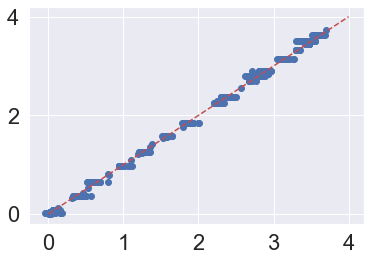

In [47]:
plt.scatter(y_pred_prelim, y_train)
xx = [0,4]
yy = [0,4]

plt.plot(xx,yy,'r--')

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_pred_prelim, y_train))

0.01241201432984801

## 5. Fine-Tune the System

In [49]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

In [50]:
# Create function to train XGBoostRegressor model with early stopping, evaluating the RMSE from the validation set to obtain the optimum number of iterations

def model_fit(model, early_stopping_rounds, eval_metric = 'rmse'):
    
    # Fit model on the training set and evaluate on the validation set
    model.fit(X_train, y_train, 
            eval_set = [(X_train, y_train), 
                      (X_valid, y_valid)], 
            eval_metric = eval_metric,
            early_stopping_rounds = early_stopping_rounds)
    
    # Print optimum number of trees, best iteration (= #opt trees - 1) and best score from the Early Stopping Rounds
    print("---------------------------------------------\nModel Report")
    print("Optimum number of trees: %d" % model.best_ntree_limit)
    print("Best iteration: %d" % model.best_iteration)
    print("Best score: %d" % model.best_score)
    print("---------------------------------------------")
    
    # Plot best result
    results = model.evals_result()
    plt.figure(figsize=(10,7))
    plt.plot(results["validation_0"]["rmse"], label="Training RMSE")
    plt.plot(results["validation_1"]["rmse"], label="Validation RMSE")
    plt.axvline(model.best_ntree_limit, color="gray", label="Optimal tree number")
    plt.xlabel("Number of trees")
    plt.ylabel("RMSE")
    plt.legend()
    plt.rc('font', size=2)  
    
    # Plot Feature Importances
    plot_importance(model)

In [51]:
# Define parameter grid
param_rand = {
 'max_depth':range(1,10,2), # before was 5, now Grid Search on [1, 3, 5, 7, 9]; >max_depth --> >over-fitting
 'min_child_weight':range(1,6,2), # before was 1, now Grid Search on [1, 3, 5] ; >min_child_weight --> <over-fitting
 'gamma':[i/10.0 for i in range(0,5)], # gamma = [0, 0.1, 0.2, 0.3, 0.4]; the default is 0; >gamma means a > minimum loss reduction requirement to make a split (makes the algoritm more conservative)
 'subsample':[i/10.0 for i in range(6,10)], # [0.6, 0.7, 0.8, 0.9]
 'colsample_bytree':[i/10.0 for i in range(6,10)], # [0.6, 0.7, 0.8, 0.9] 
 'reg_alpha':[0, 1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1, 10, 20, 50, 100, 1000],
 'learning_rate':[0.01, 0.05, 0.1, 0.5, 1]
}

# Fit model with RandomizedSearchCV to find optimum values of the parameter grid
xgbr = xgb.XGBRegressor( 
        objective='reg:squarederror',
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1, 
        gamma=0, 
        subsample=0.8, 
        colsample_bytree=0.8, 
        reg_alpha=0, 
        reg_lambda=1,
        scale_pos_weight=1,
        seed=10)

rsearch_xgbr = RandomizedSearchCV(xgbr,
    param_rand, 
    scoring='neg_root_mean_squared_error',   
    cv=5,
    verbose=True)

rsearch_xgbr.fit(X_train, y_train)
rsearch_xgbr.cv_results_, rsearch_xgbr.best_params_, rsearch_xgbr.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'mean_fit_time': array([ 2.98122725,  3.58601003,  3.28720894,  9.97714777,  3.11646571,
         12.55745392,  8.51944342, 11.89163566,  2.89565673, 11.24656072]),
  'std_fit_time': array([0.06545512, 0.07315496, 0.05783815, 0.0639178 , 0.06095142,
         0.05169693, 0.037395  , 0.03962134, 0.04929447, 0.19723647]),
  'mean_score_time': array([0.0059845 , 0.00638332, 0.00558558, 0.0055573 , 0.00458851,
         0.00594974, 0.00575886, 0.00874052, 0.00558476, 0.00515037]),
  'std_score_time': array([5.09122765e-07, 4.88889295e-04, 4.88636109e-04, 7.83012336e-04,
         4.88733445e-04, 1.83684457e-05, 3.87034643e-04, 7.43993580e-04,
         4.87779974e-04, 3.96764517e-04]),
  'param_subsample': masked_array(data=[0.9, 0.7, 0.9, 0.6, 0.7, 0.7, 0.8, 0.6, 0.6, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_reg_lambda': masked_array(data=[20, 50, 100,

In [52]:
rsearch_xgbr.best_params_

{'subsample': 0.6,
 'reg_lambda': 10,
 'reg_alpha': 0,
 'min_child_weight': 3,
 'max_depth': 9,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.9}

Lets see if I can improve a little bit with a following RandomizedSearchCV

In [54]:
# Define parameter grid
param_rand2 = {
     'subsample': [0.65, 0.7, 0.75],
     'reg_lambda': [5, 10, 15, 20],
     'reg_alpha': [1e-2, 0.05, 0.1, 0.5],
     'min_child_weight': [4, 5, 6],
     'max_depth': [8, 9, 10],
     'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.05],
     'gamma': [0, 0.1, 0.2],
     'colsample_bytree': [0.7, 0.8, 0.9]
}

# Fit model with RandomizedSearchCV to find optimum values of the parameter grid
xgbr2 = xgb.XGBRegressor( 
        objective='reg:squarederror',
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1, 
        gamma=0, 
        subsample=0.8, 
        colsample_bytree=0.8, 
        reg_alpha=0, 
        reg_lambda=1,
        scale_pos_weight=1,
        seed=10)

rsearch_xgbr2 = RandomizedSearchCV(xgbr2,
    param_rand2, 
    scoring='neg_root_mean_squared_error',   
    cv=5,
    verbose=True)

rsearch_xgbr2.fit(X_train, y_train)
rsearch_xgbr2.cv_results_, rsearch_xgbr2.best_params_, rsearch_xgbr2.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'mean_fit_time': array([12.78223515, 12.63741183, 12.68528514, 11.61236167, 12.49322467,
         10.35971155, 10.78896222, 10.89249244, 12.50201383, 11.54136243]),
  'std_fit_time': array([0.05975862, 0.0689386 , 0.01847952, 0.03656537, 0.0330634 ,
         0.08824439, 0.21556336, 0.05686699, 0.04437891, 0.03946639]),
  'mean_score_time': array([0.01534257, 0.01994061, 0.01475325, 0.01913338, 0.02051153,
         0.01694012, 0.00716739, 0.01633577, 0.01930189, 0.01672888]),
  'std_score_time': array([0.00048916, 0.00463849, 0.00073528, 0.00491379, 0.00518688,
         0.00303278, 0.00145729, 0.00048804, 0.00101925, 0.00358636]),
  'param_subsample': masked_array(data=[0.75, 0.7, 0.75, 0.75, 0.75, 0.65, 0.65, 0.65, 0.7,
                     0.65],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_reg_lambda': masked_array(data=[10, 15, 10, 15, 10, 10, 10, 5, 1

In [55]:
rsearch_xgbr2.best_params_

{'subsample': 0.7,
 'reg_lambda': 15,
 'reg_alpha': 0.1,
 'min_child_weight': 5,
 'max_depth': 9,
 'learning_rate': 0.02,
 'gamma': 0,
 'colsample_bytree': 0.8}

There is a very slight improvement, so I will keep this as my definitive model

[0]	validation_0-rmse:1.45411	validation_1-rmse:1.44732
[1]	validation_0-rmse:1.42695	validation_1-rmse:1.42060
[2]	validation_0-rmse:1.39997	validation_1-rmse:1.39396
[3]	validation_0-rmse:1.37369	validation_1-rmse:1.36792
[4]	validation_0-rmse:1.34800	validation_1-rmse:1.34246
[5]	validation_0-rmse:1.32290	validation_1-rmse:1.31756
[6]	validation_0-rmse:1.29830	validation_1-rmse:1.29333
[7]	validation_0-rmse:1.27399	validation_1-rmse:1.26915
[8]	validation_0-rmse:1.25029	validation_1-rmse:1.24563
[9]	validation_0-rmse:1.22685	validation_1-rmse:1.22258
[10]	validation_0-rmse:1.20389	validation_1-rmse:1.19995
[11]	validation_0-rmse:1.18151	validation_1-rmse:1.17788
[12]	validation_0-rmse:1.15952	validation_1-rmse:1.15618
[13]	validation_0-rmse:1.13785	validation_1-rmse:1.13478
[14]	validation_0-rmse:1.11661	validation_1-rmse:1.11377
[15]	validation_0-rmse:1.09598	validation_1-rmse:1.09347
[16]	validation_0-rmse:1.07548	validation_1-rmse:1.07315
[17]	validation_0-rmse:1.05548	validation

[144]	validation_0-rmse:0.13325	validation_1-rmse:0.15753
[145]	validation_0-rmse:0.13181	validation_1-rmse:0.15630
[146]	validation_0-rmse:0.13033	validation_1-rmse:0.15496
[147]	validation_0-rmse:0.12886	validation_1-rmse:0.15356
[148]	validation_0-rmse:0.12742	validation_1-rmse:0.15235
[149]	validation_0-rmse:0.12602	validation_1-rmse:0.15117
[150]	validation_0-rmse:0.12465	validation_1-rmse:0.15004
[151]	validation_0-rmse:0.12327	validation_1-rmse:0.14875
[152]	validation_0-rmse:0.12197	validation_1-rmse:0.14765
[153]	validation_0-rmse:0.12068	validation_1-rmse:0.14649
[154]	validation_0-rmse:0.11940	validation_1-rmse:0.14530
[155]	validation_0-rmse:0.11812	validation_1-rmse:0.14431
[156]	validation_0-rmse:0.11687	validation_1-rmse:0.14336
[157]	validation_0-rmse:0.11567	validation_1-rmse:0.14232
[158]	validation_0-rmse:0.11449	validation_1-rmse:0.14141
[159]	validation_0-rmse:0.11333	validation_1-rmse:0.14049
[160]	validation_0-rmse:0.11219	validation_1-rmse:0.13958
[161]	validati

[286]	validation_0-rmse:0.05543	validation_1-rmse:0.09425
[287]	validation_0-rmse:0.05521	validation_1-rmse:0.09408
[288]	validation_0-rmse:0.05505	validation_1-rmse:0.09393
[289]	validation_0-rmse:0.05482	validation_1-rmse:0.09377
[290]	validation_0-rmse:0.05463	validation_1-rmse:0.09361
[291]	validation_0-rmse:0.05445	validation_1-rmse:0.09352
[292]	validation_0-rmse:0.05425	validation_1-rmse:0.09337
[293]	validation_0-rmse:0.05412	validation_1-rmse:0.09324
[294]	validation_0-rmse:0.05392	validation_1-rmse:0.09314
[295]	validation_0-rmse:0.05375	validation_1-rmse:0.09302
[296]	validation_0-rmse:0.05353	validation_1-rmse:0.09283
[297]	validation_0-rmse:0.05342	validation_1-rmse:0.09271
[298]	validation_0-rmse:0.05328	validation_1-rmse:0.09257
[299]	validation_0-rmse:0.05311	validation_1-rmse:0.09245
[300]	validation_0-rmse:0.05305	validation_1-rmse:0.09242
[301]	validation_0-rmse:0.05286	validation_1-rmse:0.09223
[302]	validation_0-rmse:0.05268	validation_1-rmse:0.09207
[303]	validati

[428]	validation_0-rmse:0.04190	validation_1-rmse:0.08378
[429]	validation_0-rmse:0.04187	validation_1-rmse:0.08377
[430]	validation_0-rmse:0.04183	validation_1-rmse:0.08374
[431]	validation_0-rmse:0.04176	validation_1-rmse:0.08370
[432]	validation_0-rmse:0.04168	validation_1-rmse:0.08363
[433]	validation_0-rmse:0.04163	validation_1-rmse:0.08362
[434]	validation_0-rmse:0.04159	validation_1-rmse:0.08360
[435]	validation_0-rmse:0.04154	validation_1-rmse:0.08358
[436]	validation_0-rmse:0.04151	validation_1-rmse:0.08357
[437]	validation_0-rmse:0.04147	validation_1-rmse:0.08355
[438]	validation_0-rmse:0.04141	validation_1-rmse:0.08353
[439]	validation_0-rmse:0.04133	validation_1-rmse:0.08346
[440]	validation_0-rmse:0.04127	validation_1-rmse:0.08342
[441]	validation_0-rmse:0.04120	validation_1-rmse:0.08336
[442]	validation_0-rmse:0.04115	validation_1-rmse:0.08331
[443]	validation_0-rmse:0.04111	validation_1-rmse:0.08328
[444]	validation_0-rmse:0.04102	validation_1-rmse:0.08324
[445]	validati

[570]	validation_0-rmse:0.03597	validation_1-rmse:0.08009
[571]	validation_0-rmse:0.03594	validation_1-rmse:0.08008
[572]	validation_0-rmse:0.03588	validation_1-rmse:0.08003
[573]	validation_0-rmse:0.03586	validation_1-rmse:0.08002
[574]	validation_0-rmse:0.03580	validation_1-rmse:0.07998
[575]	validation_0-rmse:0.03577	validation_1-rmse:0.07996
[576]	validation_0-rmse:0.03575	validation_1-rmse:0.07994
[577]	validation_0-rmse:0.03571	validation_1-rmse:0.07991
[578]	validation_0-rmse:0.03568	validation_1-rmse:0.07990
[579]	validation_0-rmse:0.03565	validation_1-rmse:0.07987
[580]	validation_0-rmse:0.03560	validation_1-rmse:0.07987
[581]	validation_0-rmse:0.03559	validation_1-rmse:0.07986
[582]	validation_0-rmse:0.03556	validation_1-rmse:0.07984
[583]	validation_0-rmse:0.03555	validation_1-rmse:0.07984
[584]	validation_0-rmse:0.03554	validation_1-rmse:0.07982
[585]	validation_0-rmse:0.03552	validation_1-rmse:0.07980
[586]	validation_0-rmse:0.03548	validation_1-rmse:0.07977
[587]	validati

[712]	validation_0-rmse:0.03153	validation_1-rmse:0.07772
[713]	validation_0-rmse:0.03151	validation_1-rmse:0.07769
[714]	validation_0-rmse:0.03146	validation_1-rmse:0.07769
[715]	validation_0-rmse:0.03145	validation_1-rmse:0.07768
[716]	validation_0-rmse:0.03143	validation_1-rmse:0.07768
[717]	validation_0-rmse:0.03140	validation_1-rmse:0.07765
[718]	validation_0-rmse:0.03138	validation_1-rmse:0.07765
[719]	validation_0-rmse:0.03136	validation_1-rmse:0.07764
[720]	validation_0-rmse:0.03135	validation_1-rmse:0.07763
[721]	validation_0-rmse:0.03133	validation_1-rmse:0.07764
[722]	validation_0-rmse:0.03132	validation_1-rmse:0.07762
[723]	validation_0-rmse:0.03128	validation_1-rmse:0.07760
[724]	validation_0-rmse:0.03124	validation_1-rmse:0.07758
[725]	validation_0-rmse:0.03121	validation_1-rmse:0.07756
[726]	validation_0-rmse:0.03118	validation_1-rmse:0.07756
[727]	validation_0-rmse:0.03116	validation_1-rmse:0.07754
[728]	validation_0-rmse:0.03115	validation_1-rmse:0.07752
[729]	validati

[854]	validation_0-rmse:0.02807	validation_1-rmse:0.07632
[855]	validation_0-rmse:0.02804	validation_1-rmse:0.07633
[856]	validation_0-rmse:0.02799	validation_1-rmse:0.07630
[857]	validation_0-rmse:0.02797	validation_1-rmse:0.07631
[858]	validation_0-rmse:0.02796	validation_1-rmse:0.07630
[859]	validation_0-rmse:0.02792	validation_1-rmse:0.07629
[860]	validation_0-rmse:0.02790	validation_1-rmse:0.07630
[861]	validation_0-rmse:0.02785	validation_1-rmse:0.07627
[862]	validation_0-rmse:0.02784	validation_1-rmse:0.07627
[863]	validation_0-rmse:0.02782	validation_1-rmse:0.07624
[864]	validation_0-rmse:0.02781	validation_1-rmse:0.07624
[865]	validation_0-rmse:0.02780	validation_1-rmse:0.07622
[866]	validation_0-rmse:0.02775	validation_1-rmse:0.07621
[867]	validation_0-rmse:0.02773	validation_1-rmse:0.07621
[868]	validation_0-rmse:0.02771	validation_1-rmse:0.07621
[869]	validation_0-rmse:0.02769	validation_1-rmse:0.07621
[870]	validation_0-rmse:0.02766	validation_1-rmse:0.07620
[871]	validati

[996]	validation_0-rmse:0.02510	validation_1-rmse:0.07558
[997]	validation_0-rmse:0.02508	validation_1-rmse:0.07558
[998]	validation_0-rmse:0.02505	validation_1-rmse:0.07556
[999]	validation_0-rmse:0.02503	validation_1-rmse:0.07556
[1000]	validation_0-rmse:0.02500	validation_1-rmse:0.07555
[1001]	validation_0-rmse:0.02498	validation_1-rmse:0.07556
[1002]	validation_0-rmse:0.02495	validation_1-rmse:0.07555
[1003]	validation_0-rmse:0.02494	validation_1-rmse:0.07555
[1004]	validation_0-rmse:0.02492	validation_1-rmse:0.07555
[1005]	validation_0-rmse:0.02491	validation_1-rmse:0.07555
[1006]	validation_0-rmse:0.02490	validation_1-rmse:0.07555
[1007]	validation_0-rmse:0.02488	validation_1-rmse:0.07554
[1008]	validation_0-rmse:0.02484	validation_1-rmse:0.07553
[1009]	validation_0-rmse:0.02482	validation_1-rmse:0.07553
[1010]	validation_0-rmse:0.02480	validation_1-rmse:0.07553
[1011]	validation_0-rmse:0.02479	validation_1-rmse:0.07553
[1012]	validation_0-rmse:0.02476	validation_1-rmse:0.07552
[

[1135]	validation_0-rmse:0.02255	validation_1-rmse:0.07512
[1136]	validation_0-rmse:0.02254	validation_1-rmse:0.07511
[1137]	validation_0-rmse:0.02252	validation_1-rmse:0.07511
[1138]	validation_0-rmse:0.02249	validation_1-rmse:0.07511
[1139]	validation_0-rmse:0.02248	validation_1-rmse:0.07510
[1140]	validation_0-rmse:0.02246	validation_1-rmse:0.07508
[1141]	validation_0-rmse:0.02246	validation_1-rmse:0.07507
[1142]	validation_0-rmse:0.02244	validation_1-rmse:0.07508
[1143]	validation_0-rmse:0.02242	validation_1-rmse:0.07506
[1144]	validation_0-rmse:0.02240	validation_1-rmse:0.07505
[1145]	validation_0-rmse:0.02240	validation_1-rmse:0.07505
[1146]	validation_0-rmse:0.02238	validation_1-rmse:0.07506
[1147]	validation_0-rmse:0.02236	validation_1-rmse:0.07504
[1148]	validation_0-rmse:0.02235	validation_1-rmse:0.07505
[1149]	validation_0-rmse:0.02234	validation_1-rmse:0.07504
[1150]	validation_0-rmse:0.02232	validation_1-rmse:0.07504
[1151]	validation_0-rmse:0.02232	validation_1-rmse:0.075

[1274]	validation_0-rmse:0.02046	validation_1-rmse:0.07456
[1275]	validation_0-rmse:0.02045	validation_1-rmse:0.07457
[1276]	validation_0-rmse:0.02044	validation_1-rmse:0.07458
[1277]	validation_0-rmse:0.02042	validation_1-rmse:0.07459
[1278]	validation_0-rmse:0.02041	validation_1-rmse:0.07458
[1279]	validation_0-rmse:0.02040	validation_1-rmse:0.07458
[1280]	validation_0-rmse:0.02038	validation_1-rmse:0.07458
[1281]	validation_0-rmse:0.02037	validation_1-rmse:0.07456
[1282]	validation_0-rmse:0.02035	validation_1-rmse:0.07456
[1283]	validation_0-rmse:0.02034	validation_1-rmse:0.07455
[1284]	validation_0-rmse:0.02033	validation_1-rmse:0.07455
[1285]	validation_0-rmse:0.02030	validation_1-rmse:0.07454
[1286]	validation_0-rmse:0.02030	validation_1-rmse:0.07454
[1287]	validation_0-rmse:0.02029	validation_1-rmse:0.07453
[1288]	validation_0-rmse:0.02028	validation_1-rmse:0.07454
[1289]	validation_0-rmse:0.02025	validation_1-rmse:0.07454
[1290]	validation_0-rmse:0.02024	validation_1-rmse:0.074

[1413]	validation_0-rmse:0.01852	validation_1-rmse:0.07416
[1414]	validation_0-rmse:0.01851	validation_1-rmse:0.07416
[1415]	validation_0-rmse:0.01850	validation_1-rmse:0.07415
[1416]	validation_0-rmse:0.01849	validation_1-rmse:0.07416
[1417]	validation_0-rmse:0.01847	validation_1-rmse:0.07415
[1418]	validation_0-rmse:0.01845	validation_1-rmse:0.07416
[1419]	validation_0-rmse:0.01845	validation_1-rmse:0.07416
[1420]	validation_0-rmse:0.01843	validation_1-rmse:0.07415
[1421]	validation_0-rmse:0.01842	validation_1-rmse:0.07415
[1422]	validation_0-rmse:0.01841	validation_1-rmse:0.07415
[1423]	validation_0-rmse:0.01841	validation_1-rmse:0.07415
[1424]	validation_0-rmse:0.01840	validation_1-rmse:0.07414
[1425]	validation_0-rmse:0.01838	validation_1-rmse:0.07414
[1426]	validation_0-rmse:0.01837	validation_1-rmse:0.07414
[1427]	validation_0-rmse:0.01836	validation_1-rmse:0.07414
[1428]	validation_0-rmse:0.01835	validation_1-rmse:0.07414
[1429]	validation_0-rmse:0.01834	validation_1-rmse:0.074

[1552]	validation_0-rmse:0.01686	validation_1-rmse:0.07383
[1553]	validation_0-rmse:0.01686	validation_1-rmse:0.07383
[1554]	validation_0-rmse:0.01684	validation_1-rmse:0.07383
[1555]	validation_0-rmse:0.01682	validation_1-rmse:0.07381
[1556]	validation_0-rmse:0.01681	validation_1-rmse:0.07381
[1557]	validation_0-rmse:0.01680	validation_1-rmse:0.07381
[1558]	validation_0-rmse:0.01678	validation_1-rmse:0.07381
[1559]	validation_0-rmse:0.01677	validation_1-rmse:0.07381
[1560]	validation_0-rmse:0.01675	validation_1-rmse:0.07381
[1561]	validation_0-rmse:0.01675	validation_1-rmse:0.07380
[1562]	validation_0-rmse:0.01673	validation_1-rmse:0.07380
[1563]	validation_0-rmse:0.01672	validation_1-rmse:0.07380
[1564]	validation_0-rmse:0.01671	validation_1-rmse:0.07380
[1565]	validation_0-rmse:0.01671	validation_1-rmse:0.07380
[1566]	validation_0-rmse:0.01670	validation_1-rmse:0.07380
[1567]	validation_0-rmse:0.01669	validation_1-rmse:0.07380
[1568]	validation_0-rmse:0.01668	validation_1-rmse:0.073

[1691]	validation_0-rmse:0.01547	validation_1-rmse:0.07367
[1692]	validation_0-rmse:0.01545	validation_1-rmse:0.07366
[1693]	validation_0-rmse:0.01545	validation_1-rmse:0.07367
[1694]	validation_0-rmse:0.01544	validation_1-rmse:0.07367
[1695]	validation_0-rmse:0.01543	validation_1-rmse:0.07367
[1696]	validation_0-rmse:0.01542	validation_1-rmse:0.07367
[1697]	validation_0-rmse:0.01541	validation_1-rmse:0.07366
[1698]	validation_0-rmse:0.01540	validation_1-rmse:0.07368
[1699]	validation_0-rmse:0.01540	validation_1-rmse:0.07367
[1700]	validation_0-rmse:0.01539	validation_1-rmse:0.07368
[1701]	validation_0-rmse:0.01537	validation_1-rmse:0.07368
[1702]	validation_0-rmse:0.01536	validation_1-rmse:0.07368
[1703]	validation_0-rmse:0.01536	validation_1-rmse:0.07368
[1704]	validation_0-rmse:0.01535	validation_1-rmse:0.07368
[1705]	validation_0-rmse:0.01534	validation_1-rmse:0.07367
[1706]	validation_0-rmse:0.01532	validation_1-rmse:0.07367
[1707]	validation_0-rmse:0.01532	validation_1-rmse:0.073

[1830]	validation_0-rmse:0.01424	validation_1-rmse:0.07349
[1831]	validation_0-rmse:0.01423	validation_1-rmse:0.07349
[1832]	validation_0-rmse:0.01422	validation_1-rmse:0.07349
[1833]	validation_0-rmse:0.01421	validation_1-rmse:0.07348
[1834]	validation_0-rmse:0.01420	validation_1-rmse:0.07348
[1835]	validation_0-rmse:0.01420	validation_1-rmse:0.07349
[1836]	validation_0-rmse:0.01419	validation_1-rmse:0.07349
[1837]	validation_0-rmse:0.01418	validation_1-rmse:0.07349
[1838]	validation_0-rmse:0.01417	validation_1-rmse:0.07348
[1839]	validation_0-rmse:0.01416	validation_1-rmse:0.07348
[1840]	validation_0-rmse:0.01415	validation_1-rmse:0.07348
[1841]	validation_0-rmse:0.01414	validation_1-rmse:0.07347
[1842]	validation_0-rmse:0.01413	validation_1-rmse:0.07348
[1843]	validation_0-rmse:0.01413	validation_1-rmse:0.07347
[1844]	validation_0-rmse:0.01412	validation_1-rmse:0.07347
[1845]	validation_0-rmse:0.01410	validation_1-rmse:0.07346
[1846]	validation_0-rmse:0.01409	validation_1-rmse:0.073

[1969]	validation_0-rmse:0.01309	validation_1-rmse:0.07335
[1970]	validation_0-rmse:0.01308	validation_1-rmse:0.07336
[1971]	validation_0-rmse:0.01307	validation_1-rmse:0.07335
[1972]	validation_0-rmse:0.01306	validation_1-rmse:0.07335
[1973]	validation_0-rmse:0.01305	validation_1-rmse:0.07335
[1974]	validation_0-rmse:0.01304	validation_1-rmse:0.07335
[1975]	validation_0-rmse:0.01303	validation_1-rmse:0.07335
[1976]	validation_0-rmse:0.01302	validation_1-rmse:0.07334
[1977]	validation_0-rmse:0.01301	validation_1-rmse:0.07334
[1978]	validation_0-rmse:0.01300	validation_1-rmse:0.07334
[1979]	validation_0-rmse:0.01300	validation_1-rmse:0.07334
[1980]	validation_0-rmse:0.01299	validation_1-rmse:0.07333
[1981]	validation_0-rmse:0.01299	validation_1-rmse:0.07333
[1982]	validation_0-rmse:0.01298	validation_1-rmse:0.07333
[1983]	validation_0-rmse:0.01297	validation_1-rmse:0.07333
[1984]	validation_0-rmse:0.01297	validation_1-rmse:0.07333
[1985]	validation_0-rmse:0.01296	validation_1-rmse:0.073

[2108]	validation_0-rmse:0.01205	validation_1-rmse:0.07321
[2109]	validation_0-rmse:0.01204	validation_1-rmse:0.07321
[2110]	validation_0-rmse:0.01204	validation_1-rmse:0.07321
[2111]	validation_0-rmse:0.01203	validation_1-rmse:0.07322
[2112]	validation_0-rmse:0.01202	validation_1-rmse:0.07322
[2113]	validation_0-rmse:0.01202	validation_1-rmse:0.07322
[2114]	validation_0-rmse:0.01201	validation_1-rmse:0.07321
[2115]	validation_0-rmse:0.01201	validation_1-rmse:0.07321
[2116]	validation_0-rmse:0.01200	validation_1-rmse:0.07321
[2117]	validation_0-rmse:0.01199	validation_1-rmse:0.07320
[2118]	validation_0-rmse:0.01199	validation_1-rmse:0.07320
[2119]	validation_0-rmse:0.01198	validation_1-rmse:0.07319
[2120]	validation_0-rmse:0.01197	validation_1-rmse:0.07319
[2121]	validation_0-rmse:0.01197	validation_1-rmse:0.07318
[2122]	validation_0-rmse:0.01196	validation_1-rmse:0.07318
[2123]	validation_0-rmse:0.01196	validation_1-rmse:0.07318
[2124]	validation_0-rmse:0.01195	validation_1-rmse:0.073

[2247]	validation_0-rmse:0.01118	validation_1-rmse:0.07311
[2248]	validation_0-rmse:0.01118	validation_1-rmse:0.07310
[2249]	validation_0-rmse:0.01117	validation_1-rmse:0.07311
[2250]	validation_0-rmse:0.01116	validation_1-rmse:0.07310
[2251]	validation_0-rmse:0.01115	validation_1-rmse:0.07310
[2252]	validation_0-rmse:0.01115	validation_1-rmse:0.07309
[2253]	validation_0-rmse:0.01114	validation_1-rmse:0.07309
[2254]	validation_0-rmse:0.01113	validation_1-rmse:0.07309
[2255]	validation_0-rmse:0.01112	validation_1-rmse:0.07309
[2256]	validation_0-rmse:0.01112	validation_1-rmse:0.07309
[2257]	validation_0-rmse:0.01111	validation_1-rmse:0.07309
[2258]	validation_0-rmse:0.01111	validation_1-rmse:0.07309
[2259]	validation_0-rmse:0.01110	validation_1-rmse:0.07309
[2260]	validation_0-rmse:0.01110	validation_1-rmse:0.07309
[2261]	validation_0-rmse:0.01109	validation_1-rmse:0.07309
[2262]	validation_0-rmse:0.01109	validation_1-rmse:0.07309
[2263]	validation_0-rmse:0.01109	validation_1-rmse:0.073

[2386]	validation_0-rmse:0.01043	validation_1-rmse:0.07302
[2387]	validation_0-rmse:0.01042	validation_1-rmse:0.07302
[2388]	validation_0-rmse:0.01041	validation_1-rmse:0.07302
[2389]	validation_0-rmse:0.01041	validation_1-rmse:0.07302
[2390]	validation_0-rmse:0.01041	validation_1-rmse:0.07302
[2391]	validation_0-rmse:0.01040	validation_1-rmse:0.07302
[2392]	validation_0-rmse:0.01040	validation_1-rmse:0.07301
[2393]	validation_0-rmse:0.01039	validation_1-rmse:0.07302
[2394]	validation_0-rmse:0.01038	validation_1-rmse:0.07302
[2395]	validation_0-rmse:0.01037	validation_1-rmse:0.07302
[2396]	validation_0-rmse:0.01037	validation_1-rmse:0.07301
[2397]	validation_0-rmse:0.01036	validation_1-rmse:0.07301
[2398]	validation_0-rmse:0.01036	validation_1-rmse:0.07302
[2399]	validation_0-rmse:0.01036	validation_1-rmse:0.07302
[2400]	validation_0-rmse:0.01035	validation_1-rmse:0.07302
[2401]	validation_0-rmse:0.01035	validation_1-rmse:0.07301
[2402]	validation_0-rmse:0.01034	validation_1-rmse:0.073

[2525]	validation_0-rmse:0.00974	validation_1-rmse:0.07297
[2526]	validation_0-rmse:0.00974	validation_1-rmse:0.07297
[2527]	validation_0-rmse:0.00973	validation_1-rmse:0.07297
[2528]	validation_0-rmse:0.00973	validation_1-rmse:0.07297
[2529]	validation_0-rmse:0.00973	validation_1-rmse:0.07297
[2530]	validation_0-rmse:0.00972	validation_1-rmse:0.07298
[2531]	validation_0-rmse:0.00971	validation_1-rmse:0.07298
[2532]	validation_0-rmse:0.00971	validation_1-rmse:0.07297
[2533]	validation_0-rmse:0.00970	validation_1-rmse:0.07298
[2534]	validation_0-rmse:0.00970	validation_1-rmse:0.07298
[2535]	validation_0-rmse:0.00969	validation_1-rmse:0.07298
[2536]	validation_0-rmse:0.00969	validation_1-rmse:0.07298
[2537]	validation_0-rmse:0.00968	validation_1-rmse:0.07297
[2538]	validation_0-rmse:0.00967	validation_1-rmse:0.07297
[2539]	validation_0-rmse:0.00967	validation_1-rmse:0.07297
[2540]	validation_0-rmse:0.00967	validation_1-rmse:0.07297
[2541]	validation_0-rmse:0.00966	validation_1-rmse:0.072

[2664]	validation_0-rmse:0.00910	validation_1-rmse:0.07291
[2665]	validation_0-rmse:0.00909	validation_1-rmse:0.07291
[2666]	validation_0-rmse:0.00909	validation_1-rmse:0.07291
[2667]	validation_0-rmse:0.00908	validation_1-rmse:0.07291
[2668]	validation_0-rmse:0.00907	validation_1-rmse:0.07290
[2669]	validation_0-rmse:0.00907	validation_1-rmse:0.07290
[2670]	validation_0-rmse:0.00907	validation_1-rmse:0.07290
[2671]	validation_0-rmse:0.00906	validation_1-rmse:0.07290
[2672]	validation_0-rmse:0.00905	validation_1-rmse:0.07290
[2673]	validation_0-rmse:0.00905	validation_1-rmse:0.07290
[2674]	validation_0-rmse:0.00904	validation_1-rmse:0.07290
[2675]	validation_0-rmse:0.00904	validation_1-rmse:0.07290
[2676]	validation_0-rmse:0.00903	validation_1-rmse:0.07289
[2677]	validation_0-rmse:0.00903	validation_1-rmse:0.07289
[2678]	validation_0-rmse:0.00903	validation_1-rmse:0.07290
[2679]	validation_0-rmse:0.00902	validation_1-rmse:0.07290
[2680]	validation_0-rmse:0.00902	validation_1-rmse:0.072

[2803]	validation_0-rmse:0.00853	validation_1-rmse:0.07284
[2804]	validation_0-rmse:0.00853	validation_1-rmse:0.07285
[2805]	validation_0-rmse:0.00852	validation_1-rmse:0.07284
[2806]	validation_0-rmse:0.00852	validation_1-rmse:0.07284
[2807]	validation_0-rmse:0.00852	validation_1-rmse:0.07285
[2808]	validation_0-rmse:0.00851	validation_1-rmse:0.07285
[2809]	validation_0-rmse:0.00851	validation_1-rmse:0.07285
[2810]	validation_0-rmse:0.00851	validation_1-rmse:0.07284
[2811]	validation_0-rmse:0.00850	validation_1-rmse:0.07285
[2812]	validation_0-rmse:0.00850	validation_1-rmse:0.07285
[2813]	validation_0-rmse:0.00850	validation_1-rmse:0.07285
[2814]	validation_0-rmse:0.00849	validation_1-rmse:0.07285
[2815]	validation_0-rmse:0.00849	validation_1-rmse:0.07285
[2816]	validation_0-rmse:0.00848	validation_1-rmse:0.07285
[2817]	validation_0-rmse:0.00848	validation_1-rmse:0.07284
[2818]	validation_0-rmse:0.00848	validation_1-rmse:0.07285
[2819]	validation_0-rmse:0.00847	validation_1-rmse:0.072

[2942]	validation_0-rmse:0.00804	validation_1-rmse:0.07281
[2943]	validation_0-rmse:0.00803	validation_1-rmse:0.07281
[2944]	validation_0-rmse:0.00803	validation_1-rmse:0.07281
[2945]	validation_0-rmse:0.00803	validation_1-rmse:0.07281
[2946]	validation_0-rmse:0.00803	validation_1-rmse:0.07281
[2947]	validation_0-rmse:0.00802	validation_1-rmse:0.07281
[2948]	validation_0-rmse:0.00802	validation_1-rmse:0.07281
[2949]	validation_0-rmse:0.00801	validation_1-rmse:0.07281
[2950]	validation_0-rmse:0.00801	validation_1-rmse:0.07281
[2951]	validation_0-rmse:0.00801	validation_1-rmse:0.07281
[2952]	validation_0-rmse:0.00800	validation_1-rmse:0.07281
[2953]	validation_0-rmse:0.00800	validation_1-rmse:0.07281
[2954]	validation_0-rmse:0.00800	validation_1-rmse:0.07281
[2955]	validation_0-rmse:0.00799	validation_1-rmse:0.07281
[2956]	validation_0-rmse:0.00799	validation_1-rmse:0.07281
[2957]	validation_0-rmse:0.00799	validation_1-rmse:0.07281
[2958]	validation_0-rmse:0.00798	validation_1-rmse:0.072

[3081]	validation_0-rmse:0.00759	validation_1-rmse:0.07277
[3082]	validation_0-rmse:0.00759	validation_1-rmse:0.07277
[3083]	validation_0-rmse:0.00759	validation_1-rmse:0.07277
[3084]	validation_0-rmse:0.00758	validation_1-rmse:0.07277
[3085]	validation_0-rmse:0.00758	validation_1-rmse:0.07277
[3086]	validation_0-rmse:0.00758	validation_1-rmse:0.07277
[3087]	validation_0-rmse:0.00758	validation_1-rmse:0.07277
[3088]	validation_0-rmse:0.00757	validation_1-rmse:0.07277
[3089]	validation_0-rmse:0.00757	validation_1-rmse:0.07277
[3090]	validation_0-rmse:0.00757	validation_1-rmse:0.07277
[3091]	validation_0-rmse:0.00756	validation_1-rmse:0.07277
[3092]	validation_0-rmse:0.00756	validation_1-rmse:0.07277
[3093]	validation_0-rmse:0.00756	validation_1-rmse:0.07276
[3094]	validation_0-rmse:0.00756	validation_1-rmse:0.07277
[3095]	validation_0-rmse:0.00755	validation_1-rmse:0.07277
[3096]	validation_0-rmse:0.00755	validation_1-rmse:0.07277
[3097]	validation_0-rmse:0.00755	validation_1-rmse:0.072

[3220]	validation_0-rmse:0.00720	validation_1-rmse:0.07272
[3221]	validation_0-rmse:0.00720	validation_1-rmse:0.07272
[3222]	validation_0-rmse:0.00720	validation_1-rmse:0.07273
[3223]	validation_0-rmse:0.00720	validation_1-rmse:0.07272
[3224]	validation_0-rmse:0.00719	validation_1-rmse:0.07272
[3225]	validation_0-rmse:0.00719	validation_1-rmse:0.07273
[3226]	validation_0-rmse:0.00719	validation_1-rmse:0.07273
[3227]	validation_0-rmse:0.00719	validation_1-rmse:0.07273
[3228]	validation_0-rmse:0.00718	validation_1-rmse:0.07272
[3229]	validation_0-rmse:0.00718	validation_1-rmse:0.07273
[3230]	validation_0-rmse:0.00718	validation_1-rmse:0.07273
[3231]	validation_0-rmse:0.00717	validation_1-rmse:0.07272
[3232]	validation_0-rmse:0.00717	validation_1-rmse:0.07272
[3233]	validation_0-rmse:0.00717	validation_1-rmse:0.07272
[3234]	validation_0-rmse:0.00717	validation_1-rmse:0.07272
[3235]	validation_0-rmse:0.00716	validation_1-rmse:0.07273
[3236]	validation_0-rmse:0.00716	validation_1-rmse:0.072

[3359]	validation_0-rmse:0.00685	validation_1-rmse:0.07271
[3360]	validation_0-rmse:0.00685	validation_1-rmse:0.07271
[3361]	validation_0-rmse:0.00684	validation_1-rmse:0.07271
[3362]	validation_0-rmse:0.00684	validation_1-rmse:0.07272
[3363]	validation_0-rmse:0.00684	validation_1-rmse:0.07271
[3364]	validation_0-rmse:0.00684	validation_1-rmse:0.07272
[3365]	validation_0-rmse:0.00684	validation_1-rmse:0.07272
[3366]	validation_0-rmse:0.00683	validation_1-rmse:0.07271
[3367]	validation_0-rmse:0.00683	validation_1-rmse:0.07272
[3368]	validation_0-rmse:0.00683	validation_1-rmse:0.07271
[3369]	validation_0-rmse:0.00683	validation_1-rmse:0.07271
[3370]	validation_0-rmse:0.00682	validation_1-rmse:0.07271
[3371]	validation_0-rmse:0.00682	validation_1-rmse:0.07271
[3372]	validation_0-rmse:0.00682	validation_1-rmse:0.07271
[3373]	validation_0-rmse:0.00681	validation_1-rmse:0.07271
[3374]	validation_0-rmse:0.00681	validation_1-rmse:0.07271
[3375]	validation_0-rmse:0.00681	validation_1-rmse:0.072

[3498]	validation_0-rmse:0.00653	validation_1-rmse:0.07268
[3499]	validation_0-rmse:0.00653	validation_1-rmse:0.07268
[3500]	validation_0-rmse:0.00653	validation_1-rmse:0.07268
[3501]	validation_0-rmse:0.00653	validation_1-rmse:0.07268
[3502]	validation_0-rmse:0.00653	validation_1-rmse:0.07268
[3503]	validation_0-rmse:0.00652	validation_1-rmse:0.07268
[3504]	validation_0-rmse:0.00652	validation_1-rmse:0.07268
[3505]	validation_0-rmse:0.00652	validation_1-rmse:0.07268
[3506]	validation_0-rmse:0.00652	validation_1-rmse:0.07268
[3507]	validation_0-rmse:0.00652	validation_1-rmse:0.07268
[3508]	validation_0-rmse:0.00651	validation_1-rmse:0.07268
[3509]	validation_0-rmse:0.00651	validation_1-rmse:0.07268
[3510]	validation_0-rmse:0.00651	validation_1-rmse:0.07268
[3511]	validation_0-rmse:0.00651	validation_1-rmse:0.07268
[3512]	validation_0-rmse:0.00650	validation_1-rmse:0.07268
[3513]	validation_0-rmse:0.00650	validation_1-rmse:0.07268
[3514]	validation_0-rmse:0.00650	validation_1-rmse:0.072

[3637]	validation_0-rmse:0.00625	validation_1-rmse:0.07265
[3638]	validation_0-rmse:0.00625	validation_1-rmse:0.07265
[3639]	validation_0-rmse:0.00625	validation_1-rmse:0.07265
[3640]	validation_0-rmse:0.00625	validation_1-rmse:0.07265
[3641]	validation_0-rmse:0.00624	validation_1-rmse:0.07265
[3642]	validation_0-rmse:0.00624	validation_1-rmse:0.07265
[3643]	validation_0-rmse:0.00624	validation_1-rmse:0.07265
[3644]	validation_0-rmse:0.00624	validation_1-rmse:0.07265
[3645]	validation_0-rmse:0.00624	validation_1-rmse:0.07265
[3646]	validation_0-rmse:0.00623	validation_1-rmse:0.07265
[3647]	validation_0-rmse:0.00623	validation_1-rmse:0.07265
[3648]	validation_0-rmse:0.00623	validation_1-rmse:0.07265
[3649]	validation_0-rmse:0.00623	validation_1-rmse:0.07264
[3650]	validation_0-rmse:0.00623	validation_1-rmse:0.07265
[3651]	validation_0-rmse:0.00622	validation_1-rmse:0.07265
[3652]	validation_0-rmse:0.00622	validation_1-rmse:0.07265
[3653]	validation_0-rmse:0.00622	validation_1-rmse:0.072

[3776]	validation_0-rmse:0.00600	validation_1-rmse:0.07261
[3777]	validation_0-rmse:0.00600	validation_1-rmse:0.07261
[3778]	validation_0-rmse:0.00599	validation_1-rmse:0.07261
[3779]	validation_0-rmse:0.00599	validation_1-rmse:0.07261
[3780]	validation_0-rmse:0.00599	validation_1-rmse:0.07261
[3781]	validation_0-rmse:0.00599	validation_1-rmse:0.07261
[3782]	validation_0-rmse:0.00599	validation_1-rmse:0.07261
[3783]	validation_0-rmse:0.00599	validation_1-rmse:0.07261
[3784]	validation_0-rmse:0.00598	validation_1-rmse:0.07261
[3785]	validation_0-rmse:0.00598	validation_1-rmse:0.07260
[3786]	validation_0-rmse:0.00598	validation_1-rmse:0.07260
[3787]	validation_0-rmse:0.00598	validation_1-rmse:0.07260
[3788]	validation_0-rmse:0.00598	validation_1-rmse:0.07260
[3789]	validation_0-rmse:0.00598	validation_1-rmse:0.07260
[3790]	validation_0-rmse:0.00597	validation_1-rmse:0.07260
[3791]	validation_0-rmse:0.00597	validation_1-rmse:0.07260
[3792]	validation_0-rmse:0.00597	validation_1-rmse:0.072

[3915]	validation_0-rmse:0.00577	validation_1-rmse:0.07258
[3916]	validation_0-rmse:0.00577	validation_1-rmse:0.07258
[3917]	validation_0-rmse:0.00577	validation_1-rmse:0.07258
[3918]	validation_0-rmse:0.00576	validation_1-rmse:0.07258
[3919]	validation_0-rmse:0.00576	validation_1-rmse:0.07258
[3920]	validation_0-rmse:0.00576	validation_1-rmse:0.07258
[3921]	validation_0-rmse:0.00576	validation_1-rmse:0.07258
[3922]	validation_0-rmse:0.00576	validation_1-rmse:0.07258
[3923]	validation_0-rmse:0.00576	validation_1-rmse:0.07258
[3924]	validation_0-rmse:0.00575	validation_1-rmse:0.07258
[3925]	validation_0-rmse:0.00575	validation_1-rmse:0.07258
[3926]	validation_0-rmse:0.00575	validation_1-rmse:0.07258
[3927]	validation_0-rmse:0.00575	validation_1-rmse:0.07258
[3928]	validation_0-rmse:0.00575	validation_1-rmse:0.07258
[3929]	validation_0-rmse:0.00575	validation_1-rmse:0.07258
[3930]	validation_0-rmse:0.00575	validation_1-rmse:0.07258
[3931]	validation_0-rmse:0.00575	validation_1-rmse:0.072

[4054]	validation_0-rmse:0.00557	validation_1-rmse:0.07255
[4055]	validation_0-rmse:0.00557	validation_1-rmse:0.07255
[4056]	validation_0-rmse:0.00557	validation_1-rmse:0.07255
[4057]	validation_0-rmse:0.00557	validation_1-rmse:0.07255
[4058]	validation_0-rmse:0.00556	validation_1-rmse:0.07255
[4059]	validation_0-rmse:0.00556	validation_1-rmse:0.07255
[4060]	validation_0-rmse:0.00556	validation_1-rmse:0.07255
[4061]	validation_0-rmse:0.00556	validation_1-rmse:0.07255
[4062]	validation_0-rmse:0.00556	validation_1-rmse:0.07255
[4063]	validation_0-rmse:0.00556	validation_1-rmse:0.07255
[4064]	validation_0-rmse:0.00556	validation_1-rmse:0.07255
[4065]	validation_0-rmse:0.00555	validation_1-rmse:0.07255
[4066]	validation_0-rmse:0.00555	validation_1-rmse:0.07255
[4067]	validation_0-rmse:0.00555	validation_1-rmse:0.07255
[4068]	validation_0-rmse:0.00555	validation_1-rmse:0.07255
[4069]	validation_0-rmse:0.00555	validation_1-rmse:0.07255
[4070]	validation_0-rmse:0.00555	validation_1-rmse:0.072

[4193]	validation_0-rmse:0.00539	validation_1-rmse:0.07251
[4194]	validation_0-rmse:0.00539	validation_1-rmse:0.07251
[4195]	validation_0-rmse:0.00539	validation_1-rmse:0.07251
[4196]	validation_0-rmse:0.00539	validation_1-rmse:0.07251
[4197]	validation_0-rmse:0.00539	validation_1-rmse:0.07251
[4198]	validation_0-rmse:0.00539	validation_1-rmse:0.07251
[4199]	validation_0-rmse:0.00539	validation_1-rmse:0.07251
[4200]	validation_0-rmse:0.00539	validation_1-rmse:0.07251
[4201]	validation_0-rmse:0.00538	validation_1-rmse:0.07251
[4202]	validation_0-rmse:0.00538	validation_1-rmse:0.07251
[4203]	validation_0-rmse:0.00538	validation_1-rmse:0.07251
[4204]	validation_0-rmse:0.00538	validation_1-rmse:0.07251
[4205]	validation_0-rmse:0.00538	validation_1-rmse:0.07251
[4206]	validation_0-rmse:0.00538	validation_1-rmse:0.07251
[4207]	validation_0-rmse:0.00538	validation_1-rmse:0.07251
[4208]	validation_0-rmse:0.00537	validation_1-rmse:0.07251
[4209]	validation_0-rmse:0.00537	validation_1-rmse:0.072

[4332]	validation_0-rmse:0.00523	validation_1-rmse:0.07249
[4333]	validation_0-rmse:0.00522	validation_1-rmse:0.07249
[4334]	validation_0-rmse:0.00522	validation_1-rmse:0.07249
[4335]	validation_0-rmse:0.00522	validation_1-rmse:0.07248
[4336]	validation_0-rmse:0.00522	validation_1-rmse:0.07248
[4337]	validation_0-rmse:0.00522	validation_1-rmse:0.07248
[4338]	validation_0-rmse:0.00522	validation_1-rmse:0.07248
[4339]	validation_0-rmse:0.00522	validation_1-rmse:0.07248
[4340]	validation_0-rmse:0.00522	validation_1-rmse:0.07249
[4341]	validation_0-rmse:0.00522	validation_1-rmse:0.07249
[4342]	validation_0-rmse:0.00522	validation_1-rmse:0.07249
[4343]	validation_0-rmse:0.00521	validation_1-rmse:0.07249
[4344]	validation_0-rmse:0.00521	validation_1-rmse:0.07248
[4345]	validation_0-rmse:0.00521	validation_1-rmse:0.07248
[4346]	validation_0-rmse:0.00521	validation_1-rmse:0.07248
[4347]	validation_0-rmse:0.00521	validation_1-rmse:0.07249
[4348]	validation_0-rmse:0.00521	validation_1-rmse:0.072

[4471]	validation_0-rmse:0.00508	validation_1-rmse:0.07248
[4472]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4473]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4474]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4475]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4476]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4477]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4478]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4479]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4480]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4481]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4482]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4483]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4484]	validation_0-rmse:0.00507	validation_1-rmse:0.07248
[4485]	validation_0-rmse:0.00506	validation_1-rmse:0.07248
[4486]	validation_0-rmse:0.00506	validation_1-rmse:0.07248
[4487]	validation_0-rmse:0.00506	validation_1-rmse:0.072

[4610]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4611]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4612]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4613]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4614]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4615]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4616]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4617]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4618]	validation_0-rmse:0.00494	validation_1-rmse:0.07247
[4619]	validation_0-rmse:0.00494	validation_1-rmse:0.07248
[4620]	validation_0-rmse:0.00494	validation_1-rmse:0.07248
[4621]	validation_0-rmse:0.00493	validation_1-rmse:0.07247
[4622]	validation_0-rmse:0.00493	validation_1-rmse:0.07247
[4623]	validation_0-rmse:0.00493	validation_1-rmse:0.07247
[4624]	validation_0-rmse:0.00493	validation_1-rmse:0.07247
[4625]	validation_0-rmse:0.00493	validation_1-rmse:0.07247
[4626]	validation_0-rmse:0.00493	validation_1-rmse:0.072

[4749]	validation_0-rmse:0.00482	validation_1-rmse:0.07247
[4750]	validation_0-rmse:0.00482	validation_1-rmse:0.07247
[4751]	validation_0-rmse:0.00482	validation_1-rmse:0.07247
[4752]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4753]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4754]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4755]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4756]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4757]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4758]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4759]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4760]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4761]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4762]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4763]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4764]	validation_0-rmse:0.00481	validation_1-rmse:0.07247
[4765]	validation_0-rmse:0.00481	validation_1-rmse:0.072

[4888]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4889]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4890]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4891]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4892]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4893]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4894]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4895]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4896]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4897]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4898]	validation_0-rmse:0.00470	validation_1-rmse:0.07246
[4899]	validation_0-rmse:0.00469	validation_1-rmse:0.07246
[4900]	validation_0-rmse:0.00469	validation_1-rmse:0.07246
[4901]	validation_0-rmse:0.00469	validation_1-rmse:0.07246
[4902]	validation_0-rmse:0.00469	validation_1-rmse:0.07245
[4903]	validation_0-rmse:0.00469	validation_1-rmse:0.07245
[4904]	validation_0-rmse:0.00469	validation_1-rmse:0.072

[5027]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5028]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5029]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5030]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5031]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5032]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5033]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5034]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5035]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5036]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5037]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5038]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5039]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5040]	validation_0-rmse:0.00460	validation_1-rmse:0.07244
[5041]	validation_0-rmse:0.00459	validation_1-rmse:0.07244
[5042]	validation_0-rmse:0.00459	validation_1-rmse:0.07244
[5043]	validation_0-rmse:0.00459	validation_1-rmse:0.072

[5166]	validation_0-rmse:0.00451	validation_1-rmse:0.07244
[5167]	validation_0-rmse:0.00451	validation_1-rmse:0.07244
[5168]	validation_0-rmse:0.00451	validation_1-rmse:0.07244
[5169]	validation_0-rmse:0.00451	validation_1-rmse:0.07244
[5170]	validation_0-rmse:0.00451	validation_1-rmse:0.07244
[5171]	validation_0-rmse:0.00451	validation_1-rmse:0.07244
[5172]	validation_0-rmse:0.00451	validation_1-rmse:0.07244
[5173]	validation_0-rmse:0.00451	validation_1-rmse:0.07244
[5174]	validation_0-rmse:0.00450	validation_1-rmse:0.07244
[5175]	validation_0-rmse:0.00450	validation_1-rmse:0.07244
[5176]	validation_0-rmse:0.00450	validation_1-rmse:0.07244
[5177]	validation_0-rmse:0.00450	validation_1-rmse:0.07244
[5178]	validation_0-rmse:0.00450	validation_1-rmse:0.07244
[5179]	validation_0-rmse:0.00450	validation_1-rmse:0.07244
[5180]	validation_0-rmse:0.00450	validation_1-rmse:0.07244
[5181]	validation_0-rmse:0.00450	validation_1-rmse:0.07244
[5182]	validation_0-rmse:0.00450	validation_1-rmse:0.072

[5305]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5306]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5307]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5308]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5309]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5310]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5311]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5312]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5313]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5314]	validation_0-rmse:0.00442	validation_1-rmse:0.07243
[5315]	validation_0-rmse:0.00441	validation_1-rmse:0.07243
[5316]	validation_0-rmse:0.00441	validation_1-rmse:0.07243
[5317]	validation_0-rmse:0.00441	validation_1-rmse:0.07243
[5318]	validation_0-rmse:0.00441	validation_1-rmse:0.07243
[5319]	validation_0-rmse:0.00441	validation_1-rmse:0.07243
[5320]	validation_0-rmse:0.00441	validation_1-rmse:0.07243
[5321]	validation_0-rmse:0.00441	validation_1-rmse:0.072

[5444]	validation_0-rmse:0.00434	validation_1-rmse:0.07243
[5445]	validation_0-rmse:0.00434	validation_1-rmse:0.07243
[5446]	validation_0-rmse:0.00434	validation_1-rmse:0.07243
[5447]	validation_0-rmse:0.00433	validation_1-rmse:0.07243
[5448]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5449]	validation_0-rmse:0.00433	validation_1-rmse:0.07243
[5450]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5451]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5452]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5453]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5454]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5455]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5456]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5457]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5458]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5459]	validation_0-rmse:0.00433	validation_1-rmse:0.07242
[5460]	validation_0-rmse:0.00433	validation_1-rmse:0.072

[5583]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5584]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5585]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5586]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5587]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5588]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5589]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5590]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5591]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5592]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5593]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5594]	validation_0-rmse:0.00426	validation_1-rmse:0.07241
[5595]	validation_0-rmse:0.00425	validation_1-rmse:0.07241
[5596]	validation_0-rmse:0.00425	validation_1-rmse:0.07242
[5597]	validation_0-rmse:0.00425	validation_1-rmse:0.07242
[5598]	validation_0-rmse:0.00425	validation_1-rmse:0.07242
[5599]	validation_0-rmse:0.00425	validation_1-rmse:0.072

[5722]	validation_0-rmse:0.00419	validation_1-rmse:0.07241
[5723]	validation_0-rmse:0.00419	validation_1-rmse:0.07241
[5724]	validation_0-rmse:0.00419	validation_1-rmse:0.07241
[5725]	validation_0-rmse:0.00419	validation_1-rmse:0.07241
[5726]	validation_0-rmse:0.00419	validation_1-rmse:0.07241
[5727]	validation_0-rmse:0.00419	validation_1-rmse:0.07241
[5728]	validation_0-rmse:0.00419	validation_1-rmse:0.07241
[5729]	validation_0-rmse:0.00419	validation_1-rmse:0.07241
[5730]	validation_0-rmse:0.00418	validation_1-rmse:0.07241
[5731]	validation_0-rmse:0.00418	validation_1-rmse:0.07241
[5732]	validation_0-rmse:0.00418	validation_1-rmse:0.07241
[5733]	validation_0-rmse:0.00418	validation_1-rmse:0.07241
[5734]	validation_0-rmse:0.00418	validation_1-rmse:0.07241
[5735]	validation_0-rmse:0.00418	validation_1-rmse:0.07241
[5736]	validation_0-rmse:0.00418	validation_1-rmse:0.07241
[5737]	validation_0-rmse:0.00418	validation_1-rmse:0.07241
[5738]	validation_0-rmse:0.00418	validation_1-rmse:0.072

[5861]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5862]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5863]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5864]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5865]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5866]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5867]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5868]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5869]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5870]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5871]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5872]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5873]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5874]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5875]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5876]	validation_0-rmse:0.00412	validation_1-rmse:0.07240
[5877]	validation_0-rmse:0.00411	validation_1-rmse:0.072

[6000]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6001]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6002]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6003]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6004]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6005]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6006]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6007]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6008]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6009]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6010]	validation_0-rmse:0.00406	validation_1-rmse:0.07239
[6011]	validation_0-rmse:0.00405	validation_1-rmse:0.07239
[6012]	validation_0-rmse:0.00405	validation_1-rmse:0.07239
[6013]	validation_0-rmse:0.00405	validation_1-rmse:0.07239
[6014]	validation_0-rmse:0.00405	validation_1-rmse:0.07239
[6015]	validation_0-rmse:0.00405	validation_1-rmse:0.07239
[6016]	validation_0-rmse:0.00405	validation_1-rmse:0.072

[6139]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6140]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6141]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6142]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6143]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6144]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6145]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6146]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6147]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6148]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6149]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6150]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6151]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6152]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6153]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6154]	validation_0-rmse:0.00400	validation_1-rmse:0.07238
[6155]	validation_0-rmse:0.00400	validation_1-rmse:0.072

[6278]	validation_0-rmse:0.00395	validation_1-rmse:0.07237
[6279]	validation_0-rmse:0.00395	validation_1-rmse:0.07237
[6280]	validation_0-rmse:0.00395	validation_1-rmse:0.07237
[6281]	validation_0-rmse:0.00395	validation_1-rmse:0.07237
[6282]	validation_0-rmse:0.00395	validation_1-rmse:0.07237
[6283]	validation_0-rmse:0.00395	validation_1-rmse:0.07237
[6284]	validation_0-rmse:0.00395	validation_1-rmse:0.07237
[6285]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6286]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6287]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6288]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6289]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6290]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6291]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6292]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6293]	validation_0-rmse:0.00394	validation_1-rmse:0.07237
[6294]	validation_0-rmse:0.00394	validation_1-rmse:0.072

[6417]	validation_0-rmse:0.00390	validation_1-rmse:0.07237
[6418]	validation_0-rmse:0.00390	validation_1-rmse:0.07237
[6419]	validation_0-rmse:0.00390	validation_1-rmse:0.07237
[6420]	validation_0-rmse:0.00390	validation_1-rmse:0.07237
[6421]	validation_0-rmse:0.00390	validation_1-rmse:0.07237
[6422]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6423]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6424]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6425]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6426]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6427]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6428]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6429]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6430]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6431]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6432]	validation_0-rmse:0.00389	validation_1-rmse:0.07237
[6433]	validation_0-rmse:0.00389	validation_1-rmse:0.072

[6556]	validation_0-rmse:0.00385	validation_1-rmse:0.07236
[6557]	validation_0-rmse:0.00385	validation_1-rmse:0.07236
[6558]	validation_0-rmse:0.00385	validation_1-rmse:0.07236
[6559]	validation_0-rmse:0.00385	validation_1-rmse:0.07236
[6560]	validation_0-rmse:0.00385	validation_1-rmse:0.07236
[6561]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6562]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6563]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6564]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6565]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6566]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6567]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6568]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6569]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6570]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6571]	validation_0-rmse:0.00384	validation_1-rmse:0.07236
[6572]	validation_0-rmse:0.00384	validation_1-rmse:0.072

[6695]	validation_0-rmse:0.00380	validation_1-rmse:0.07235
[6696]	validation_0-rmse:0.00380	validation_1-rmse:0.07235
[6697]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6698]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6699]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6700]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6701]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6702]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6703]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6704]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6705]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6706]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6707]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6708]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6709]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6710]	validation_0-rmse:0.00380	validation_1-rmse:0.07236
[6711]	validation_0-rmse:0.00380	validation_1-rmse:0.072

[6834]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6835]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6836]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6837]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6838]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6839]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6840]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6841]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6842]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6843]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6844]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6845]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6846]	validation_0-rmse:0.00376	validation_1-rmse:0.07235
[6847]	validation_0-rmse:0.00375	validation_1-rmse:0.07235
[6848]	validation_0-rmse:0.00375	validation_1-rmse:0.07235
[6849]	validation_0-rmse:0.00375	validation_1-rmse:0.07235
[6850]	validation_0-rmse:0.00375	validation_1-rmse:0.072

[6973]	validation_0-rmse:0.00372	validation_1-rmse:0.07235
[6974]	validation_0-rmse:0.00372	validation_1-rmse:0.07235
[6975]	validation_0-rmse:0.00372	validation_1-rmse:0.07235
[6976]	validation_0-rmse:0.00372	validation_1-rmse:0.07235
[6977]	validation_0-rmse:0.00372	validation_1-rmse:0.07235
[6978]	validation_0-rmse:0.00372	validation_1-rmse:0.07235
[6979]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6980]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6981]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6982]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6983]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6984]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6985]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6986]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6987]	validation_0-rmse:0.00371	validation_1-rmse:0.07235
[6988]	validation_0-rmse:0.00371	validation_1-rmse:0.07234
[6989]	validation_0-rmse:0.00371	validation_1-rmse:0.072

[7112]	validation_0-rmse:0.00368	validation_1-rmse:0.07234
[7113]	validation_0-rmse:0.00368	validation_1-rmse:0.07234
[7114]	validation_0-rmse:0.00368	validation_1-rmse:0.07234
[7115]	validation_0-rmse:0.00368	validation_1-rmse:0.07234
[7116]	validation_0-rmse:0.00368	validation_1-rmse:0.07234
[7117]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7118]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7119]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7120]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7121]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7122]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7123]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7124]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7125]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7126]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7127]	validation_0-rmse:0.00367	validation_1-rmse:0.07234
[7128]	validation_0-rmse:0.00367	validation_1-rmse:0.072

[7251]	validation_0-rmse:0.00364	validation_1-rmse:0.07233
[7252]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7253]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7254]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7255]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7256]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7257]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7258]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7259]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7260]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7261]	validation_0-rmse:0.00364	validation_1-rmse:0.07234
[7262]	validation_0-rmse:0.00364	validation_1-rmse:0.07233
[7263]	validation_0-rmse:0.00364	validation_1-rmse:0.07233
[7264]	validation_0-rmse:0.00364	validation_1-rmse:0.07233
[7265]	validation_0-rmse:0.00364	validation_1-rmse:0.07233
[7266]	validation_0-rmse:0.00363	validation_1-rmse:0.07233
[7267]	validation_0-rmse:0.00363	validation_1-rmse:0.072

[7390]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7391]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7392]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7393]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7394]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7395]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7396]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7397]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7398]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7399]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7400]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7401]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7402]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7403]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7404]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7405]	validation_0-rmse:0.00360	validation_1-rmse:0.07233
[7406]	validation_0-rmse:0.00360	validation_1-rmse:0.072

[7529]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7530]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7531]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7532]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7533]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7534]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7535]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7536]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7537]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7538]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7539]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7540]	validation_0-rmse:0.00357	validation_1-rmse:0.07233
[7541]	validation_0-rmse:0.00356	validation_1-rmse:0.07233
[7542]	validation_0-rmse:0.00356	validation_1-rmse:0.07233
[7543]	validation_0-rmse:0.00356	validation_1-rmse:0.07233
[7544]	validation_0-rmse:0.00356	validation_1-rmse:0.07233
[7545]	validation_0-rmse:0.00356	validation_1-rmse:0.072

[7668]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7669]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7670]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7671]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7672]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7673]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7674]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7675]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7676]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7677]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7678]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7679]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7680]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7681]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7682]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7683]	validation_0-rmse:0.00353	validation_1-rmse:0.07232
[7684]	validation_0-rmse:0.00353	validation_1-rmse:0.072

[7807]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7808]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7809]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7810]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7811]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7812]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7813]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7814]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7815]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7816]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7817]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7818]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7819]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7820]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7821]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7822]	validation_0-rmse:0.00350	validation_1-rmse:0.07232
[7823]	validation_0-rmse:0.00350	validation_1-rmse:0.072

[7946]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7947]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7948]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7949]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7950]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7951]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7952]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7953]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7954]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7955]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7956]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7957]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7958]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7959]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7960]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7961]	validation_0-rmse:0.00347	validation_1-rmse:0.07232
[7962]	validation_0-rmse:0.00347	validation_1-rmse:0.072

[8085]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8086]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8087]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8088]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8089]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8090]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8091]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8092]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8093]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8094]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8095]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8096]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8097]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8098]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8099]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8100]	validation_0-rmse:0.00344	validation_1-rmse:0.07232
[8101]	validation_0-rmse:0.00344	validation_1-rmse:0.072

[8224]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8225]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8226]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8227]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8228]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8229]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8230]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8231]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8232]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8233]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8234]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8235]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8236]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8237]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8238]	validation_0-rmse:0.00342	validation_1-rmse:0.07231
[8239]	validation_0-rmse:0.00341	validation_1-rmse:0.07231
[8240]	validation_0-rmse:0.00341	validation_1-rmse:0.072

[8363]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8364]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8365]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8366]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8367]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8368]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8369]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8370]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8371]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8372]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8373]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8374]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8375]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8376]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8377]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8378]	validation_0-rmse:0.00339	validation_1-rmse:0.07231
[8379]	validation_0-rmse:0.00339	validation_1-rmse:0.072

[8502]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8503]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8504]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8505]	validation_0-rmse:0.00336	validation_1-rmse:0.07230
[8506]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8507]	validation_0-rmse:0.00336	validation_1-rmse:0.07230
[8508]	validation_0-rmse:0.00336	validation_1-rmse:0.07230
[8509]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8510]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8511]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8512]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8513]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8514]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8515]	validation_0-rmse:0.00336	validation_1-rmse:0.07231
[8516]	validation_0-rmse:0.00336	validation_1-rmse:0.07230
[8517]	validation_0-rmse:0.00336	validation_1-rmse:0.07230
[8518]	validation_0-rmse:0.00336	validation_1-rmse:0.072

[8641]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8642]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8643]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8644]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8645]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8646]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8647]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8648]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8649]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8650]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8651]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8652]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8653]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8654]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8655]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8656]	validation_0-rmse:0.00334	validation_1-rmse:0.07231
[8657]	validation_0-rmse:0.00334	validation_1-rmse:0.072

[8780]	validation_0-rmse:0.00332	validation_1-rmse:0.07231
[8781]	validation_0-rmse:0.00332	validation_1-rmse:0.07231
[8782]	validation_0-rmse:0.00332	validation_1-rmse:0.07231
[8783]	validation_0-rmse:0.00332	validation_1-rmse:0.07231
[8784]	validation_0-rmse:0.00332	validation_1-rmse:0.07231
[8785]	validation_0-rmse:0.00332	validation_1-rmse:0.07231
[8786]	validation_0-rmse:0.00332	validation_1-rmse:0.07231
[8787]	validation_0-rmse:0.00332	validation_1-rmse:0.07231
[8788]	validation_0-rmse:0.00331	validation_1-rmse:0.07231
[8789]	validation_0-rmse:0.00331	validation_1-rmse:0.07231
[8790]	validation_0-rmse:0.00331	validation_1-rmse:0.07231
[8791]	validation_0-rmse:0.00331	validation_1-rmse:0.07231
[8792]	validation_0-rmse:0.00331	validation_1-rmse:0.07231
[8793]	validation_0-rmse:0.00331	validation_1-rmse:0.07231
[8794]	validation_0-rmse:0.00331	validation_1-rmse:0.07230
[8795]	validation_0-rmse:0.00331	validation_1-rmse:0.07231
[8796]	validation_0-rmse:0.00331	validation_1-rmse:0.072

[8919]	validation_0-rmse:0.00330	validation_1-rmse:0.07230
[8920]	validation_0-rmse:0.00330	validation_1-rmse:0.07230
[8921]	validation_0-rmse:0.00330	validation_1-rmse:0.07230
[8922]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8923]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8924]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8925]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8926]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8927]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8928]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8929]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8930]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8931]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8932]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8933]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8934]	validation_0-rmse:0.00329	validation_1-rmse:0.07230
[8935]	validation_0-rmse:0.00329	validation_1-rmse:0.072

[9058]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9059]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9060]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9061]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9062]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9063]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9064]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9065]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9066]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9067]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9068]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9069]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9070]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9071]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9072]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9073]	validation_0-rmse:0.00327	validation_1-rmse:0.07230
[9074]	validation_0-rmse:0.00327	validation_1-rmse:0.072

[9197]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9198]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9199]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9200]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9201]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9202]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9203]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9204]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9205]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9206]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9207]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9208]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9209]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9210]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9211]	validation_0-rmse:0.00325	validation_1-rmse:0.07230
[9212]	validation_0-rmse:0.00325	validation_1-rmse:0.07229
[9213]	validation_0-rmse:0.00325	validation_1-rmse:0.072

[9336]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9337]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9338]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9339]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9340]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9341]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9342]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9343]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9344]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9345]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9346]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9347]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9348]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9349]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9350]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9351]	validation_0-rmse:0.00323	validation_1-rmse:0.07229
[9352]	validation_0-rmse:0.00323	validation_1-rmse:0.072

[9475]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9476]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9477]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9478]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9479]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9480]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9481]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9482]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9483]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9484]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9485]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9486]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9487]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9488]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9489]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9490]	validation_0-rmse:0.00321	validation_1-rmse:0.07229
[9491]	validation_0-rmse:0.00321	validation_1-rmse:0.072

[9614]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9615]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9616]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9617]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9618]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9619]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9620]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9621]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9622]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9623]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9624]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9625]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9626]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9627]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9628]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9629]	validation_0-rmse:0.00319	validation_1-rmse:0.07229
[9630]	validation_0-rmse:0.00319	validation_1-rmse:0.072

[9753]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9754]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9755]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9756]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9757]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9758]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9759]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9760]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9761]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9762]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9763]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9764]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9765]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9766]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9767]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9768]	validation_0-rmse:0.00317	validation_1-rmse:0.07229
[9769]	validation_0-rmse:0.00317	validation_1-rmse:0.072

[9892]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9893]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9894]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9895]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9896]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9897]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9898]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9899]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9900]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9901]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9902]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9903]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9904]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9905]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9906]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9907]	validation_0-rmse:0.00315	validation_1-rmse:0.07229
[9908]	validation_0-rmse:0.00315	validation_1-rmse:0.072

[10031]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10032]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10033]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10034]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10035]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10036]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10037]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10038]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10039]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10040]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10041]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10042]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10043]	validation_0-rmse:0.00314	validation_1-rmse:0.07229
[10044]	validation_0-rmse:0.00313	validation_1-rmse:0.07229
[10045]	validation_0-rmse:0.00313	validation_1-rmse:0.07229
[10046]	validation_0-rmse:0.00313	validation_1-rmse:0.07229
[10047]	validation_0-rmse:0.00313	valida

[10168]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10169]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10170]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10171]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10172]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10173]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10174]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10175]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10176]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10177]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10178]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10179]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10180]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10181]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10182]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10183]	validation_0-rmse:0.00312	validation_1-rmse:0.07229
[10184]	validation_0-rmse:0.00312	valida

[10305]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10306]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10307]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10308]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10309]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10310]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10311]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10312]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10313]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10314]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10315]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10316]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10317]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10318]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10319]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10320]	validation_0-rmse:0.00310	validation_1-rmse:0.07229
[10321]	validation_0-rmse:0.00310	valida

[10442]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10443]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10444]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10445]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10446]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10447]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10448]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10449]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10450]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10451]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10452]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10453]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10454]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10455]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10456]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10457]	validation_0-rmse:0.00309	validation_1-rmse:0.07229
[10458]	validation_0-rmse:0.00309	valida

[10579]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10580]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10581]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10582]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10583]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10584]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10585]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10586]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10587]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10588]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10589]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10590]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10591]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10592]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10593]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10594]	validation_0-rmse:0.00307	validation_1-rmse:0.07228
[10595]	validation_0-rmse:0.00307	valida

[10716]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10717]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10718]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10719]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10720]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10721]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10722]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10723]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10724]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10725]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10726]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10727]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10728]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10729]	validation_0-rmse:0.00306	validation_1-rmse:0.07228
[10730]	validation_0-rmse:0.00305	validation_1-rmse:0.07228
[10731]	validation_0-rmse:0.00305	validation_1-rmse:0.07228
[10732]	validation_0-rmse:0.00305	valida

[10853]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10854]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10855]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10856]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10857]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10858]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10859]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10860]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10861]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10862]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10863]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10864]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10865]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10866]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10867]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10868]	validation_0-rmse:0.00304	validation_1-rmse:0.07228
[10869]	validation_0-rmse:0.00304	valida

[10990]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10991]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10992]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10993]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10994]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10995]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10996]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10997]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10998]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[10999]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[11000]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[11001]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[11002]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[11003]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[11004]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[11005]	validation_0-rmse:0.00303	validation_1-rmse:0.07228
[11006]	validation_0-rmse:0.00303	valida

[11127]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11128]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11129]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11130]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11131]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11132]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11133]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11134]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11135]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11136]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11137]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11138]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11139]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11140]	validation_0-rmse:0.00301	validation_1-rmse:0.07227
[11141]	validation_0-rmse:0.00301	validation_1-rmse:0.07228
[11142]	validation_0-rmse:0.00301	validation_1-rmse:0.07228
[11143]	validation_0-rmse:0.00301	valida

[11264]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11265]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11266]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11267]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11268]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11269]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11270]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11271]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11272]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11273]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11274]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11275]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11276]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11277]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11278]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11279]	validation_0-rmse:0.00300	validation_1-rmse:0.07227
[11280]	validation_0-rmse:0.00300	valida

[11401]	validation_0-rmse:0.00299	validation_1-rmse:0.07227
[11402]	validation_0-rmse:0.00299	validation_1-rmse:0.07227
[11403]	validation_0-rmse:0.00299	validation_1-rmse:0.07227
[11404]	validation_0-rmse:0.00299	validation_1-rmse:0.07227
[11405]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11406]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11407]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11408]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11409]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11410]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11411]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11412]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11413]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11414]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11415]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11416]	validation_0-rmse:0.00298	validation_1-rmse:0.07227
[11417]	validation_0-rmse:0.00298	valida

[11538]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11539]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11540]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11541]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11542]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11543]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11544]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11545]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11546]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11547]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11548]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11549]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11550]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11551]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11552]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11553]	validation_0-rmse:0.00297	validation_1-rmse:0.07227
[11554]	validation_0-rmse:0.00297	valida

[11675]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11676]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11677]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11678]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11679]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11680]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11681]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11682]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11683]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11684]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11685]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11686]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11687]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11688]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11689]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11690]	validation_0-rmse:0.00296	validation_1-rmse:0.07227
[11691]	validation_0-rmse:0.00296	valida

[11812]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11813]	validation_0-rmse:0.00295	validation_1-rmse:0.07226
[11814]	validation_0-rmse:0.00295	validation_1-rmse:0.07226
[11815]	validation_0-rmse:0.00295	validation_1-rmse:0.07226
[11816]	validation_0-rmse:0.00295	validation_1-rmse:0.07226
[11817]	validation_0-rmse:0.00295	validation_1-rmse:0.07226
[11818]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11819]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11820]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11821]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11822]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11823]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11824]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11825]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11826]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11827]	validation_0-rmse:0.00295	validation_1-rmse:0.07227
[11828]	validation_0-rmse:0.00295	valida

[11949]	validation_0-rmse:0.00294	validation_1-rmse:0.07227
[11950]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11951]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11952]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11953]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11954]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11955]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11956]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11957]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11958]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11959]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11960]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11961]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11962]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11963]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11964]	validation_0-rmse:0.00293	validation_1-rmse:0.07227
[11965]	validation_0-rmse:0.00293	valida

[12086]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12087]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12088]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12089]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12090]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12091]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12092]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12093]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12094]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12095]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12096]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12097]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12098]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12099]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12100]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12101]	validation_0-rmse:0.00292	validation_1-rmse:0.07226
[12102]	validation_0-rmse:0.00292	valida

[12223]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12224]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12225]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12226]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12227]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12228]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12229]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12230]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12231]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12232]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12233]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12234]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12235]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12236]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12237]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12238]	validation_0-rmse:0.00291	validation_1-rmse:0.07226
[12239]	validation_0-rmse:0.00291	valida

[12360]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12361]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12362]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12363]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12364]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12365]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12366]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12367]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12368]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12369]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12370]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12371]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12372]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12373]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12374]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12375]	validation_0-rmse:0.00290	validation_1-rmse:0.07226
[12376]	validation_0-rmse:0.00290	valida

[12497]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12498]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12499]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12500]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12501]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12502]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12503]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12504]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12505]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12506]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12507]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12508]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12509]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12510]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12511]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12512]	validation_0-rmse:0.00289	validation_1-rmse:0.07226
[12513]	validation_0-rmse:0.00289	valida

[12634]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12635]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12636]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12637]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12638]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12639]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12640]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12641]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12642]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12643]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12644]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12645]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12646]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12647]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12648]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12649]	validation_0-rmse:0.00288	validation_1-rmse:0.07226
[12650]	validation_0-rmse:0.00288	valida

[12771]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12772]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12773]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12774]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12775]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12776]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12777]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12778]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12779]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12780]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12781]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12782]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12783]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12784]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12785]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12786]	validation_0-rmse:0.00287	validation_1-rmse:0.07226
[12787]	validation_0-rmse:0.00287	valida

[12908]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12909]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12910]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12911]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12912]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12913]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12914]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12915]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12916]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12917]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12918]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12919]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12920]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12921]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12922]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12923]	validation_0-rmse:0.00286	validation_1-rmse:0.07226
[12924]	validation_0-rmse:0.00286	valida

[13045]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13046]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13047]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13048]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13049]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13050]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13051]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13052]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13053]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13054]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13055]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13056]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13057]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13058]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13059]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13060]	validation_0-rmse:0.00285	validation_1-rmse:0.07226
[13061]	validation_0-rmse:0.00285	valida

[13182]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13183]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13184]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13185]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13186]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13187]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13188]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13189]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13190]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13191]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13192]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13193]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13194]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13195]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13196]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13197]	validation_0-rmse:0.00284	validation_1-rmse:0.07226
[13198]	validation_0-rmse:0.00284	valida

[13319]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13320]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13321]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13322]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13323]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13324]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13325]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13326]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13327]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13328]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13329]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13330]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13331]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13332]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13333]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13334]	validation_0-rmse:0.00283	validation_1-rmse:0.07226
[13335]	validation_0-rmse:0.00283	valida

[13456]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13457]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13458]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13459]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13460]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13461]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13462]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13463]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13464]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13465]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13466]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13467]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13468]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13469]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13470]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13471]	validation_0-rmse:0.00282	validation_1-rmse:0.07226
[13472]	validation_0-rmse:0.00282	valida

[13593]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13594]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13595]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13596]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13597]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13598]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13599]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13600]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13601]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13602]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13603]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13604]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13605]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13606]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13607]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13608]	validation_0-rmse:0.00281	validation_1-rmse:0.07225
[13609]	validation_0-rmse:0.00281	valida

[13730]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13731]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13732]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13733]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13734]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13735]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13736]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13737]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13738]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13739]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13740]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13741]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13742]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13743]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13744]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13745]	validation_0-rmse:0.00280	validation_1-rmse:0.07225
[13746]	validation_0-rmse:0.00280	valida

[13867]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13868]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13869]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13870]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13871]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13872]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13873]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13874]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13875]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13876]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13877]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13878]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13879]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13880]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13881]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13882]	validation_0-rmse:0.00279	validation_1-rmse:0.07225
[13883]	validation_0-rmse:0.00279	valida

[14004]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14005]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14006]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14007]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14008]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14009]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14010]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14011]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14012]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14013]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14014]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14015]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14016]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14017]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14018]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14019]	validation_0-rmse:0.00278	validation_1-rmse:0.07225
[14020]	validation_0-rmse:0.00278	valida

[14141]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14142]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14143]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14144]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14145]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14146]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14147]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14148]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14149]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14150]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14151]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14152]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14153]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14154]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14155]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14156]	validation_0-rmse:0.00277	validation_1-rmse:0.07225
[14157]	validation_0-rmse:0.00277	valida

[14278]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14279]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14280]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14281]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14282]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14283]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14284]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14285]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14286]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14287]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14288]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14289]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14290]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14291]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14292]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14293]	validation_0-rmse:0.00276	validation_1-rmse:0.07225
[14294]	validation_0-rmse:0.00276	valida

[14415]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14416]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14417]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14418]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14419]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14420]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14421]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14422]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14423]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14424]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14425]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14426]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14427]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14428]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14429]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14430]	validation_0-rmse:0.00275	validation_1-rmse:0.07225
[14431]	validation_0-rmse:0.00275	valida

[14552]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14553]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14554]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14555]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14556]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14557]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14558]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14559]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14560]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14561]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14562]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14563]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14564]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14565]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14566]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14567]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14568]	validation_0-rmse:0.00274	valida

[14689]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14690]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14691]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14692]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14693]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14694]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14695]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14696]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14697]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14698]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14699]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14700]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14701]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14702]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14703]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14704]	validation_0-rmse:0.00274	validation_1-rmse:0.07225
[14705]	validation_0-rmse:0.00274	valida

[14826]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14827]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14828]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14829]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14830]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14831]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14832]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14833]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14834]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14835]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14836]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14837]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14838]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14839]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14840]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14841]	validation_0-rmse:0.00273	validation_1-rmse:0.07225
[14842]	validation_0-rmse:0.00273	valida

[14963]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14964]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14965]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14966]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14967]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14968]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14969]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14970]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14971]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14972]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14973]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14974]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14975]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14976]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14977]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14978]	validation_0-rmse:0.00272	validation_1-rmse:0.07225
[14979]	validation_0-rmse:0.00272	valida

[15100]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15101]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15102]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15103]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15104]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15105]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15106]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15107]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15108]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15109]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15110]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15111]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15112]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15113]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15114]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15115]	validation_0-rmse:0.00271	validation_1-rmse:0.07225
[15116]	validation_0-rmse:0.00271	valida

[15237]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15238]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15239]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15240]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15241]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15242]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15243]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15244]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15245]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15246]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15247]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15248]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15249]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15250]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15251]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15252]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15253]	validation_0-rmse:0.00270	valida

[15374]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15375]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15376]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15377]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15378]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15379]	validation_0-rmse:0.00270	validation_1-rmse:0.07225
[15380]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15381]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15382]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15383]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15384]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15385]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15386]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15387]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15388]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15389]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15390]	validation_0-rmse:0.00269	valida

[15511]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15512]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15513]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15514]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15515]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15516]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15517]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15518]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15519]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15520]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15521]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15522]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15523]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15524]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15525]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15526]	validation_0-rmse:0.00269	validation_1-rmse:0.07225
[15527]	validation_0-rmse:0.00269	valida

[15648]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15649]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15650]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15651]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15652]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15653]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15654]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15655]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15656]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15657]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15658]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15659]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15660]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15661]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15662]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15663]	validation_0-rmse:0.00268	validation_1-rmse:0.07225
[15664]	validation_0-rmse:0.00268	valida

[15785]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15786]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15787]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15788]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15789]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15790]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15791]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15792]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15793]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15794]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15795]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15796]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15797]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15798]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15799]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15800]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15801]	validation_0-rmse:0.00267	valida

[15922]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15923]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15924]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15925]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15926]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15927]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15928]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15929]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15930]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15931]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15932]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15933]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15934]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15935]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15936]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15937]	validation_0-rmse:0.00267	validation_1-rmse:0.07225
[15938]	validation_0-rmse:0.00267	valida

[16059]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16060]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16061]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16062]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16063]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16064]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16065]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16066]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16067]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16068]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16069]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16070]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16071]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16072]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16073]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16074]	validation_0-rmse:0.00266	validation_1-rmse:0.07225
[16075]	validation_0-rmse:0.00266	valida

[16196]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16197]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16198]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16199]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16200]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16201]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16202]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16203]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16204]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16205]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16206]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16207]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16208]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16209]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16210]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16211]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16212]	validation_0-rmse:0.00265	valida

[16333]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16334]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16335]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16336]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16337]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16338]	validation_0-rmse:0.00265	validation_1-rmse:0.07225
[16339]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16340]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16341]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16342]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16343]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16344]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16345]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16346]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16347]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16348]	validation_0-rmse:0.00265	validation_1-rmse:0.07224
[16349]	validation_0-rmse:0.00265	valida

[16470]	validation_0-rmse:0.00264	validation_1-rmse:0.07224
[16471]	validation_0-rmse:0.00264	validation_1-rmse:0.07224
[16472]	validation_0-rmse:0.00264	validation_1-rmse:0.07224
[16473]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16474]	validation_0-rmse:0.00264	validation_1-rmse:0.07224
[16475]	validation_0-rmse:0.00264	validation_1-rmse:0.07224
[16476]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16477]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16478]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16479]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16480]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16481]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16482]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16483]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16484]	validation_0-rmse:0.00264	validation_1-rmse:0.07225
[16485]	validation_0-rmse:0.00264	validation_1-rmse:0.07224
[16486]	validation_0-rmse:0.00264	valida

[16607]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16608]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16609]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16610]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16611]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16612]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16613]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16614]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16615]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16616]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16617]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16618]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16619]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16620]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16621]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16622]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16623]	validation_0-rmse:0.00263	valida

[16744]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16745]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16746]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16747]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16748]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16749]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16750]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16751]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16752]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16753]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16754]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16755]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16756]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16757]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16758]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16759]	validation_0-rmse:0.00263	validation_1-rmse:0.07224
[16760]	validation_0-rmse:0.00263	valida

[16881]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16882]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16883]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16884]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16885]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16886]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16887]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16888]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16889]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16890]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16891]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16892]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16893]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16894]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16895]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16896]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[16897]	validation_0-rmse:0.00262	valida

[17018]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17019]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17020]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17021]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17022]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17023]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17024]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17025]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17026]	validation_0-rmse:0.00262	validation_1-rmse:0.07224
[17027]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17028]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17029]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17030]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17031]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17032]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17033]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17034]	validation_0-rmse:0.00261	valida

[17155]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17156]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17157]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17158]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17159]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17160]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17161]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17162]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17163]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17164]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17165]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17166]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17167]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17168]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17169]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17170]	validation_0-rmse:0.00261	validation_1-rmse:0.07224
[17171]	validation_0-rmse:0.00261	valida

[17292]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17293]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17294]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17295]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17296]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17297]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17298]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17299]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17300]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17301]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17302]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17303]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17304]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17305]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17306]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17307]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17308]	validation_0-rmse:0.00260	valida

[17429]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17430]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17431]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17432]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17433]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17434]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17435]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17436]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17437]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17438]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17439]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17440]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17441]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17442]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17443]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17444]	validation_0-rmse:0.00260	validation_1-rmse:0.07224
[17445]	validation_0-rmse:0.00260	valida

[17566]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17567]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17568]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17569]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17570]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17571]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17572]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17573]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17574]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17575]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17576]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17577]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17578]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17579]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17580]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17581]	validation_0-rmse:0.00259	validation_1-rmse:0.07224
[17582]	validation_0-rmse:0.00259	valida

[17703]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17704]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17705]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17706]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17707]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17708]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17709]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17710]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17711]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17712]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17713]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17714]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17715]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17716]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17717]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17718]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17719]	validation_0-rmse:0.00258	valida

[17840]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17841]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17842]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17843]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17844]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17845]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17846]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17847]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17848]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17849]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17850]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17851]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17852]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17853]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17854]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17855]	validation_0-rmse:0.00258	validation_1-rmse:0.07224
[17856]	validation_0-rmse:0.00258	valida

[17977]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17978]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17979]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17980]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17981]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17982]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17983]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17984]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17985]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17986]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17987]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17988]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17989]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17990]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17991]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17992]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[17993]	validation_0-rmse:0.00257	valida

[18114]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18115]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18116]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18117]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18118]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18119]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18120]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18121]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18122]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18123]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18124]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18125]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18126]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18127]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18128]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18129]	validation_0-rmse:0.00257	validation_1-rmse:0.07224
[18130]	validation_0-rmse:0.00257	valida

[18251]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18252]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18253]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18254]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18255]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18256]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18257]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18258]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18259]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18260]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18261]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18262]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18263]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18264]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18265]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18266]	validation_0-rmse:0.00256	validation_1-rmse:0.07224
[18267]	validation_0-rmse:0.00256	valida

[18388]	validation_0-rmse:0.00255	validation_1-rmse:0.07224
[18389]	validation_0-rmse:0.00255	validation_1-rmse:0.07224
[18390]	validation_0-rmse:0.00255	validation_1-rmse:0.07224
[18391]	validation_0-rmse:0.00255	validation_1-rmse:0.07224
[18392]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18393]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18394]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18395]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18396]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18397]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18398]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18399]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18400]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18401]	validation_0-rmse:0.00255	validation_1-rmse:0.07224
[18402]	validation_0-rmse:0.00255	validation_1-rmse:0.07224
[18403]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18404]	validation_0-rmse:0.00255	valida

[18525]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18526]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18527]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18528]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18529]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18530]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18531]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18532]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18533]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18534]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18535]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18536]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18537]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18538]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18539]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18540]	validation_0-rmse:0.00255	validation_1-rmse:0.07223
[18541]	validation_0-rmse:0.00255	valida

[18662]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18663]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18664]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18665]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18666]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18667]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18668]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18669]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18670]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18671]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18672]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18673]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18674]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18675]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18676]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18677]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18678]	validation_0-rmse:0.00254	valida

[18799]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18800]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18801]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18802]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18803]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18804]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18805]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18806]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18807]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18808]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18809]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18810]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18811]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18812]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18813]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18814]	validation_0-rmse:0.00254	validation_1-rmse:0.07223
[18815]	validation_0-rmse:0.00254	valida

[18936]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18937]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18938]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18939]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18940]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18941]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18942]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18943]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18944]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18945]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18946]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18947]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18948]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18949]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18950]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18951]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[18952]	validation_0-rmse:0.00253	valida

[19073]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19074]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19075]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19076]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19077]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19078]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19079]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19080]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19081]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19082]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19083]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19084]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19085]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19086]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19087]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19088]	validation_0-rmse:0.00253	validation_1-rmse:0.07223
[19089]	validation_0-rmse:0.00253	valida

[19210]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19211]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19212]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19213]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19214]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19215]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19216]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19217]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19218]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19219]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19220]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19221]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19222]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19223]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19224]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19225]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19226]	validation_0-rmse:0.00252	valida

[19347]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19348]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19349]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19350]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19351]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19352]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19353]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19354]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19355]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19356]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19357]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19358]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19359]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19360]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19361]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19362]	validation_0-rmse:0.00252	validation_1-rmse:0.07223
[19363]	validation_0-rmse:0.00252	valida

[19484]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19485]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19486]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19487]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19488]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19489]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19490]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19491]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19492]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19493]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19494]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19495]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19496]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19497]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19498]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19499]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19500]	validation_0-rmse:0.00251	valida

[19621]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19622]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19623]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19624]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19625]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19626]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19627]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19628]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19629]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19630]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19631]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19632]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19633]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19634]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19635]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19636]	validation_0-rmse:0.00251	validation_1-rmse:0.07223
[19637]	validation_0-rmse:0.00251	valida

[19758]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19759]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19760]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19761]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19762]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19763]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19764]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19765]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19766]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19767]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19768]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19769]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19770]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19771]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19772]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19773]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19774]	validation_0-rmse:0.00250	valida

[19895]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19896]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19897]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19898]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19899]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19900]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19901]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19902]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19903]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19904]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19905]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19906]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19907]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19908]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19909]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19910]	validation_0-rmse:0.00250	validation_1-rmse:0.07223
[19911]	validation_0-rmse:0.00250	valida

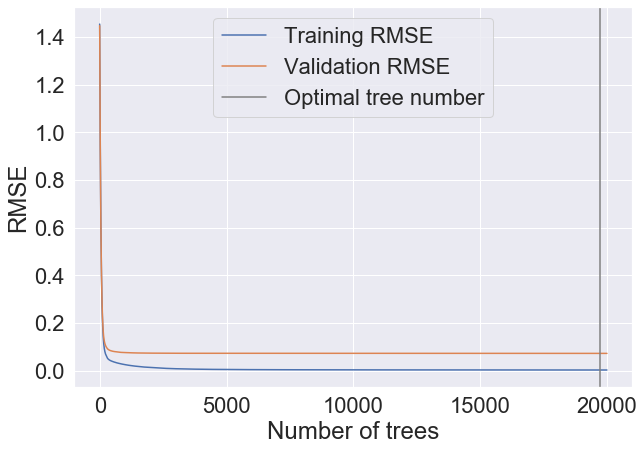

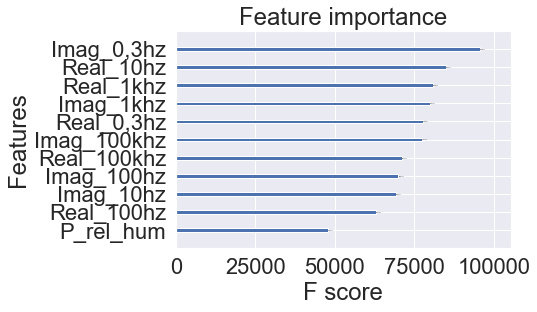

In [56]:
xgb_es = xgb.XGBRegressor(objective='reg:squarederror',
                   n_estimators=20000,
                   booster='gbtree',   
                   **rsearch_xgbr2.best_params_)

model_fit(xgb_es, early_stopping_rounds=2000)

As I said in the EDA section, low frequencies are the most important features, and the tendency is to decrease importance as frequency gets higher.

However, all the features seem important to predict TAN.

### Final evaluations of the model

In [57]:
# Make predictions
y_pred_train = xgb_es.predict(X_train)
y_pred_test = xgb_es.predict(X_test)

# Calculate RMSE
rms_train = sqrt(mean_squared_error(y_train, y_pred_train))
rms_test = sqrt(mean_squared_error(y_test, y_pred_test))

# Print Results
print("---------------------------------------------\nFinal Results")
print("XGBoost Regressor Train RMSE: %.4f" % rms_train)
print("XGBoost Regressor Test RMSE: %.4f" % rms_test)
print("---------------------------------------------")

---------------------------------------------
Final Results
XGBoost Regressor Train RMSE: 0.0025
XGBoost Regressor Test RMSE: 0.0783
---------------------------------------------


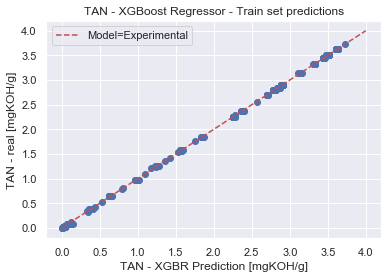

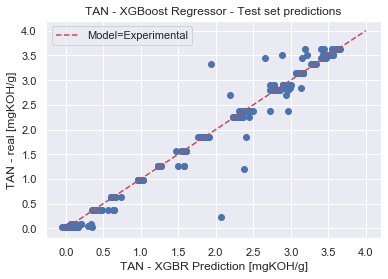

In [58]:
# XGBoost Regressor
sns.set(font_scale=1)

# Train
plt.scatter(y_pred_train, y_train)
plt.plot(xx,yy,'r--', label='Model=Experimental')
plt.title('TAN - XGBoost Regressor - Train set predictions')
plt.ylabel('TAN - real [mgKOH/g]')
plt.xlabel('TAN - XGBR Prediction [mgKOH/g]')
plt.legend()

plt.show()

# Test
plt.scatter(y_pred_test, y_test)
plt.plot(xx,yy,'r--', label='Model=Experimental')
plt.title('TAN - XGBoost Regressor - Test set predictions')
plt.ylabel('TAN - real [mgKOH/g]')
plt.xlabel('TAN - XGBR Prediction [mgKOH/g]')
plt.legend()

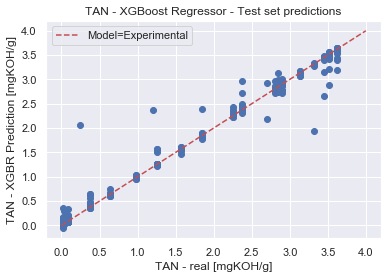

In [59]:
plt.scatter(y_test, y_pred_test)
plt.plot(xx,yy,'r--', label='Model=Experimental')
plt.title('TAN - XGBoost Regressor - Test set predictions')
plt.ylabel('TAN - XGBR Prediction [mgKOH/g]')
plt.xlabel('TAN - real [mgKOH/g]')
plt.legend()